# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Capstone Project - Lena Vogelsang 

## About the Datasets:
## OASIS MRI and Dementia Dataset

- **ID** or **Subject ID** - Primary key for patient records.
- **MRI ID** - Primary key for MRI records.
- **Group** - Nondemented vs. Demented
- **Visit** - Visit order.
- **MR Delay** or **Delay** - MR delay time. Time since first visit in days.
- **M/F** - Gender (M = Male, F = Female)
- **Hand** - Dominant hand (R = Right).
- **Age** - Age in years.
- **Educ** - Years of education. 
- **Educ** - Education (1 = less than high school grad., 2 = high school grad., 3 = some college, 4 = colllege grad., 5 = beyond college)
- **SES** - Socioeconomic status (1 = Highest to 5 = Lowest)
- **MMSE** - Mini Mental State Examination (Max = 30; Lower values correspond to decreasing cognitive functioning)
- **CDR** - Clinical Dementia Rating (0 = No dementia, 0.5 = Very mild dementia, 1 = Mild cognitive impairment, 2 = Moderate cognitive impairment, 3 = Severe cognitive impairment)
- **eTIV** - Estimated total intracranial volume. 
- **nWBV** - Normalized whole brain volume. 
- **ASF** - Atlas scaling factor. eTIV was computed by scaling the manually-measured intracranial volume by an ASF, which standardizes for head size. 

## Importing Python Libraries

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
plt.style.use('fivethirtyeight')
%matplotlib inline

## Reading, Exploring and Editing the Cross-Sectional Dataset

In [2]:
df_mri_c = pd.read_csv('./oasis_cross-sectional.csv')

In [3]:
type(df_mri_c)

pandas.core.frame.DataFrame

In [4]:
df_mri_c.head(5)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [5]:
df_mri_c.sample(5)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
228,OAS1_0254_MR1,F,R,85,5.0,1.0,29.0,0.0,1264,0.705,1.388,NaN
314,OAS1_0348_MR1,F,R,22,NaN,NaN,NaN,NaN,1473,0.841,1.191,NaN
57,OAS1_0062_MR1,F,R,73,3.0,2.0,30.0,0.0,1456,0.754,1.205,NaN
63,OAS1_0068_MR1,F,R,67,3.0,4.0,30.0,0.0,1508,0.805,1.164,NaN
215,OAS1_0236_MR1,F,R,20,NaN,NaN,NaN,NaN,1218,0.876,1.441,NaN


In [6]:
df_mri_c.shape

(436, 12)

## Changing the Index

In [7]:
df_mri_c.index

RangeIndex(start=0, stop=436, step=1)

In [8]:
df_mri_c.set_index("ID", inplace = True)

In [9]:
df_mri_c.index.names = ["MRI ID"]

## Editing the Columns

In [10]:
df_mri_c.columns

Index(['M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF', 'Delay'],
      dtype='object')

In [11]:
df_mri_c.rename(columns={'M/F':'Gender', 'Educ':'Education'},inplace=True)

In [12]:
pd.DataFrame(df_mri_c.dtypes, columns=['Type']).T

,Gender,Hand,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
Type,object,object,int64,float64,float64,float64,float64,int64,float64,float64,float64


### Continuous Variables

In [13]:
df_mri_c.describe()

,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


### Handling Null Values

In [14]:
df_null = pd.DataFrame(df_mri_c.isnull().sum(), columns=['Count of Nulls'])
df_null.index.name = 'Column'
df_null.T

Column,Gender,Hand,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
Count of Nulls,0,0,0,201,220,201,201,0,0,0,416


#### The "Delay" Variable:

The "Delay" variable refers to the time since the first visit. However, as this is a cross-sectional dataset, it is not relevant here. This explains the  high number of nulls in this column. So, we can simply drop it.

In [15]:
df_mri_c.drop('Delay', axis=1, inplace=True)

#### The "CDR" Variable:

Our goal is to predict the Clinical Dementia Rating (CDR) of patients, i.e., their dementia severity. If we do not have a patient's CDR value, we can delete the patient from our dataset. 

In [16]:
df_mri_c.dropna(how='any', subset=['CDR'], inplace=True)

In [17]:
df_mri_c.shape

(235, 10)

#### Re-check Null Values:

In [18]:
df_null = pd.DataFrame(df_mri_c.isnull().sum(), columns=['Count of Nulls'])
df_null.index.name = 'Column'
df_null.T

Column,Gender,Hand,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF
Count of Nulls,0,0,0,0,19,0,0,0,0,0


#### The "SES" Variable:

We still have 19 nulls in the "SES" column. It is not a variable of major interest, so I am happy to simply replace the null values with the median.

In [19]:
df_mri_c.fillna(value={'SES': df_mri_c.SES.median()}, inplace=True)

In [20]:
df_mri_c["SES"].isnull().sum()

0

### Categorical Variables

In [21]:
df_mri_c[["Gender", "Hand"]].describe()

,Gender,Hand
count,235,235
unique,2,1
top,F,R
freq,156,235


#### Dummy Coding the "Gender" Variable:

In [22]:
df_mri_c.Gender.unique()

array(['F', 'M'], dtype=object)

In [23]:
df_mri_c["Gender"].replace({"F": 0, "M": 1}, inplace=True)

#### Removing "Hand" Variable:

Because the "Hand" variable only has one unique value, it won't add anything useful to our analyses.

In [24]:
df_mri_c.Hand.nunique(dropna=False)

1

In [25]:
df_mri_c.drop('Hand', axis=1, inplace=True)

## The cross-sectional dataset is cleaned and ready to use!

In [26]:
df_mri_c.sample(5)

,Gender,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF
MRI ID,,,,,,,,,
OAS1_0204_MR1,1,48,4.0,1.0,29.0,0.0,1430,0.797,1.227
OAS1_0369_MR1,0,73,4.0,1.0,28.0,0.0,1295,0.772,1.356
OAS1_0267_MR1,1,80,5.0,2.0,28.0,0.5,1506,0.679,1.166
OAS1_0223_MR1,1,84,2.0,2.0,20.0,1.0,1641,0.703,1.070
OAS1_0056_MR1,0,72,3.0,3.0,15.0,1.0,1324,0.668,1.325


## Reading, Exploring and Editing the Longitudinal Dataset

In [27]:
df_mri_l = pd.read_csv('./oasis_longitudinal.csv')

In [28]:
type(df_mri_l)

pandas.core.frame.DataFrame

In [29]:
df_mri_l.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [30]:
df_mri_l.sample(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
155,OAS2_0071,OAS2_0071_MR2,Demented,2,365,F,R,84,13,2.0,28.0,1.0,1402,0.695,1.252
125,OAS2_0058,OAS2_0058_MR3,Demented,3,764,M,R,80,14,3.0,29.0,0.5,1324,0.695,1.326
53,OAS2_0029,OAS2_0029_MR1,Nondemented,1,0,F,R,77,12,4.0,29.0,0.0,1377,0.734,1.275
23,OAS2_0013,OAS2_0013_MR2,Nondemented,2,643,F,R,82,12,4.0,30.0,0.0,1212,0.720,1.448
350,OAS2_0177,OAS2_0177_MR2,Nondemented,2,665,M,R,70,14,3.0,28.0,0.0,1510,0.770,1.162


In [31]:
df_mri_l.shape

(373, 15)

### Changing the Index

In [32]:
df_mri_l.index

RangeIndex(start=0, stop=373, step=1)

In [33]:
df_mri_l.set_index("MRI ID", inplace = True)

### Editing the Columns

In [34]:
df_mri_l.columns

Index(['Subject ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age',
       'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [35]:
df_mri_l.rename(columns={"Group": "Dementia Group", "M/F": "Gender", "EDUC": "Education"}, inplace=True)

In [36]:
pd.DataFrame(df_mri_l.dtypes, columns=["Type"]).T

,Subject ID,Dementia Group,Visit,MR Delay,Gender,Hand,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF
Type,object,object,int64,int64,object,object,int64,int64,float64,float64,float64,int64,float64,float64


### Continuous Variables

In [37]:
df_mri_l.describe()

,Visit,MR Delay,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


I will retain the variables "Visit" and "MR Delay" as they may become relevant for my second analysis.

### Handling Null Values

In [38]:
df_null = pd.DataFrame(df_mri_l.isnull().sum(), columns=['Count of Nulls'])
df_null.index.name = 'Column'
df_null.T

Column,Subject ID,Dementia Group,Visit,MR Delay,Gender,Hand,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF
Count of Nulls,0,0,0,0,0,0,0,0,19,2,0,0,0,0


#### The "SES" Variable:

We have 19 nulls in the "SES" column. Again, it is not a variable of major interest, so I am happy to simply replace the null values with the median. 

In [39]:
df_mri_l.fillna(value={"SES": df_mri_l.SES.median()}, inplace=True)

In [40]:
df_mri_l["SES"].isnull().sum()

0

#### The "MMSE" Variable:

We have two nulls in the "MMSE" column. Because MMSE is dependent on the CDR variable, I calculate the mean of MMSE grouped by CDR and replace the nulls accordingly.

In [41]:
df_mri_l.groupby(by='CDR')['MMSE'].mean()

CDR
0.0    29.223301
0.5    26.357724
1.0    21.051282
2.0    20.333333
Name: MMSE, dtype: float64

In [42]:
df_mri_l[df_mri_l.isnull().any(axis=1)]

,Subject ID,Dementia Group,Visit,MR Delay,Gender,Hand,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF
MRI ID,,,,,,,,,,,,,,
OAS2_0181_MR2,OAS2_0181,Demented,2,539,F,R,75,12,2.0,NaN,1.0,1169,0.742,1.501
OAS2_0181_MR3,OAS2_0181,Demented,3,1107,F,R,77,12,2.0,NaN,1.0,1159,0.733,1.515


Because both patients with a MMSE null value have a CDR = 1.0, we simply replace both null values with 21.0 (closest value to the mean MMSE of the 1.0 CDR group). 

In [43]:
df_mri_l.fillna(value={"MMSE": 21.0}, inplace=True)

In [44]:
df_mri_l["MMSE"].isnull().sum()

0

### Categorical Variables

In [45]:
df_mri_l[["Subject ID", "Dementia Group", "Gender", "Hand"]].describe()

,Subject ID,Dementia Group,Gender,Hand
count,373,373,373,373
unique,150,3,2,1
top,OAS2_0073,Nondemented,F,R
freq,5,190,213,373


I will retain the variable "Subject ID" as it allows to identify multiple patient records for my second analysis.

I will retain the variable "Dementia Group" as it will be my outcome variable for my second analysis.

#### Dummy Coding the "Gender" Variable:

In [46]:
df_mri_l.Gender.unique()

array(['M', 'F'], dtype=object)

In [47]:
df_mri_l["Gender"].replace({"F": 0, "M": 1}, inplace=True)

#### Removing "Hand" Variable:

Because the "Hand" variable only has one unique value, it won't add anything useful to our analyses.

In [48]:
df_mri_l.Hand.nunique(dropna=False)

1

In [49]:
df_mri_l.drop("Hand", axis=1, inplace=True)

### The longitudinal dataset is cleaned and ready to use!

In [50]:
df_mri_l.sample(5)

,Subject ID,Dementia Group,Visit,MR Delay,Gender,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF
MRI ID,,,,,,,,,,,,,
OAS2_0119_MR1,OAS2_0119,Nondemented,1,0,0,81,15,2.0,28.0,0.0,1486,0.754,1.181
OAS2_0104_MR1,OAS2_0104,Demented,1,0,1,70,16,1.0,25.0,0.5,1568,0.696,1.119
OAS2_0051_MR1,OAS2_0051,Nondemented,1,0,0,92,23,1.0,29.0,0.0,1454,0.701,1.207
OAS2_0121_MR2,OAS2_0121,Nondemented,2,647,0,74,11,4.0,30.0,0.0,1517,0.705,1.157
OAS2_0183_MR2,OAS2_0183,Nondemented,2,182,0,66,13,2.0,30.0,0.0,1506,0.740,1.165


## Project (1): Creating and Exploring the Final Dataset

My aim is to test whether we can use data derived from MRI images and some additional demographic variables to accurately predict dementia severity. For this purpose, I will combine my two datasets and then run mutliple prediction models.

### Creating the Final Dataset

In [51]:
mri_1 = pd.concat([df_mri_c,df_mri_l])

In [52]:
type(mri_1)

pandas.core.frame.DataFrame

In [53]:
mri_1.sample(10)

,Gender,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF,Subject ID,Dementia Group,Visit,MR Delay
MRI ID,,,,,,,,,,,,,
OAS1_0116_MR1,0,52,5.0,1.0,30.0,0.0,1373,0.784,1.279,NaN,NaN,NaN,NaN
OAS2_0129_MR2,0,80,18.0,1.0,30.0,0.0,1436,0.663,1.222,OAS2_0129,Nondemented,2.0,737.0
OAS1_0432_MR1,0,72,2.0,4.0,26.0,0.5,1453,0.773,1.208,NaN,NaN,NaN,NaN
OAS2_0027_MR2,0,71,12.0,3.0,30.0,0.0,1360,0.782,1.291,OAS2_0027,Nondemented,2.0,609.0
OAS2_0094_MR2,0,63,16.0,1.0,30.0,0.0,1449,0.774,1.212,OAS2_0094,Nondemented,2.0,817.0
OAS1_0411_MR1,0,71,5.0,1.0,29.0,0.5,1346,0.742,1.304,NaN,NaN,NaN,NaN
OAS2_0001_MR1,1,87,14.0,2.0,27.0,0.0,1987,0.696,0.883,OAS2_0001,Nondemented,1.0,0.0
OAS1_0058_MR1,0,46,5.0,1.0,30.0,0.0,1585,0.817,1.107,NaN,NaN,NaN,NaN
OAS1_0133_MR1,0,65,5.0,2.0,30.0,0.0,1277,0.814,1.374,NaN,NaN,NaN,NaN


In [54]:
mri_1.shape

(608, 13)

### Editing the Final Dataset

In [55]:
mri_1.columns

Index(['Gender', 'Age', 'Education', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF', 'Subject ID', 'Dementia Group', 'Visit', 'MR Delay'],
      dtype='object')

#### Deleting Irrelevant Columns:

For the purpose of the first analysis, we do not need the variables "Subject ID", "Dementia Group", "Visit", or "MR Delay":

In [56]:
mri_1.drop(["Subject ID", "Dementia Group", "Visit", "MR Delay"], axis=1, inplace=True)

#### The "Education" Variable:

"Education" was measured differently in both studies, and, unfortunately, I was unsuccesful in finding a key to transform my "Education" values accurately, so I remove them from further analyses.

In [57]:
mri_1.drop("Education", axis=1, inplace=True)

### Exploring and "Double-Checking" the Dataset

In [58]:
mri_1.sample(5)

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
MRI ID,,,,,,,,
OAS1_0023_MR1,1,82,3.0,27.0,0.5,1420,0.710,1.236
OAS2_0070_MR3,1,84,1.0,29.0,0.0,1707,0.717,1.028
OAS2_0031_MR3,0,91,3.0,28.0,0.5,1463,0.696,1.199
OAS2_0128_MR1,0,76,1.0,28.0,0.0,1346,0.762,1.304
OAS2_0175_MR3,1,73,4.0,28.0,0.5,1803,0.731,0.973


In [59]:
mri_1.shape

(608, 8)

In [60]:
mri_1.columns

Index(['Gender', 'Age', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'], dtype='object')

In [61]:
pd.DataFrame(mri_1.dtypes, columns=['Type']).T

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
Type,int64,int64,float64,float64,float64,int64,float64,float64


In [62]:
df_null = pd.DataFrame(mri_1.isnull().sum(), columns=['Count of Nulls'])
df_null.index.name = 'Column'
df_null.T

Column,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
Count of Nulls,0,0,0,0,0,0,0,0


### The final dataset for Project 1 is cleaned and ready to go!

## Project (1): Exploratory Data Analyses

In [63]:
mri_1.describe()

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.00000,608.000000
mean,0.393092,75.208882,2.442434,27.213816,0.288651,1477.062500,0.73713,1.203597
std,0.488839,9.865026,1.098138,3.699193,0.377697,170.653795,0.04267,0.135091
min,0.000000,33.000000,1.000000,4.000000,0.000000,1106.000000,0.64400,0.876000
25%,0.000000,70.000000,2.000000,26.000000,0.000000,1352.500000,0.70400,1.118000
50%,0.000000,76.000000,2.000000,29.000000,0.000000,1460.000000,0.73600,1.202000
75%,1.000000,82.000000,3.000000,30.000000,0.500000,1569.000000,0.76625,1.297500
max,1.000000,98.000000,5.000000,30.000000,2.000000,2004.000000,0.84700,1.587000


In [64]:
mri_1.CDR.value_counts()

0.0    341
0.5    193
1.0     69
2.0      5
Name: CDR, dtype: int64

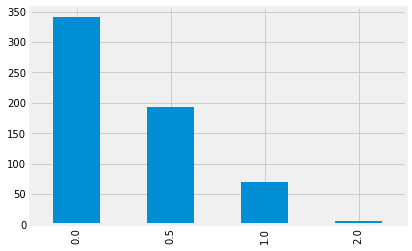

In [65]:
mri_1.CDR.value_counts().plot(kind='bar');

In [66]:
mri_1.groupby('CDR')[["Age", "SES", "MMSE", "eTIV", "nWBV", "ASF"]].mean()

,Age,SES,MMSE,eTIV,nWBV,ASF
CDR,,,,,,
0.0,73.956012,2.331378,29.173021,1468.914956,0.751845,1.210393
0.5,76.958549,2.585492,26.098446,1485.585492,0.724057,1.197741
1.0,75.884058,2.594203,21.304348,1491.434783,0.703841,1.188667
2.0,83.800000,2.400000,18.200000,1505.400000,0.697600,1.172200


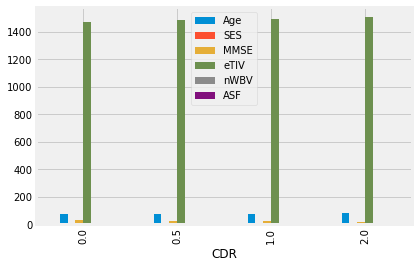

In [67]:
mri_1.groupby('CDR')[["Age", "SES", "MMSE", "eTIV", "nWBV", "ASF"]].mean().plot(kind='bar');

The range of our scores differ substantially. One way to resolve this is to look at our variables seperately:

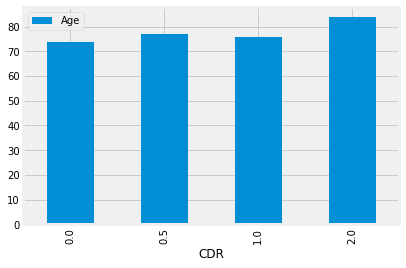

In [68]:
mri_1.groupby('CDR')[["Age"]].mean().plot(kind='bar');

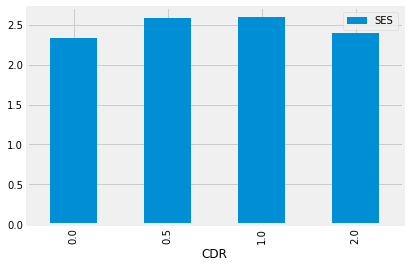

In [69]:
mri_1.groupby('CDR')[["SES"]].mean().plot(kind='bar');

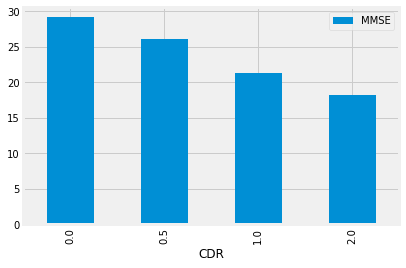

In [70]:
mri_1.groupby('CDR')[["MMSE"]].mean().plot(kind='bar');

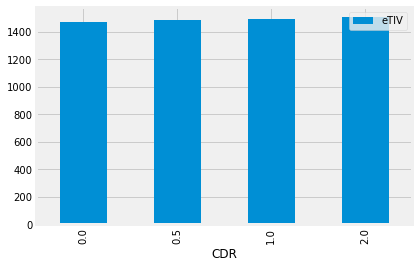

In [71]:
mri_1.groupby('CDR')[["eTIV"]].mean().plot(kind='bar');

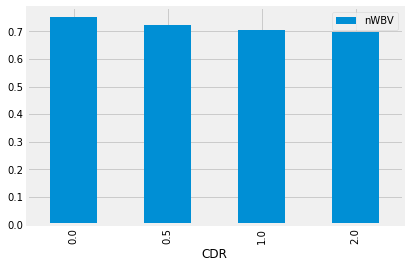

In [72]:
mri_1.groupby('CDR')[["nWBV"]].mean().plot(kind='bar');

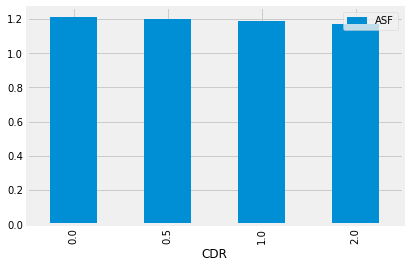

In [73]:
mri_1.groupby('CDR')[["ASF"]].mean().plot(kind='bar');

Another way is to normalize the data. This might also be useful for building better prediction models:

In [74]:
from sklearn import preprocessing

x = mri_1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
mri_1_norm = pd.DataFrame(x_scaled)

In [75]:
mri_1_norm.sample(5)

,0,1,2,3,4,5,6,7
48,0.0,0.738462,0.25,0.884615,0.25,0.386414,0.408867,0.466948
169,0.0,0.723077,1.00,0.884615,0.00,0.306236,0.532020,0.554149
121,1.0,0.476923,0.25,0.692308,0.25,0.491091,0.482759,0.362869
356,0.0,0.769231,0.25,0.961538,0.00,0.515590,0.556650,0.340366
237,1.0,0.646154,0.25,0.730769,0.25,0.636971,0.453202,0.239100


In [76]:
mri_1_norm.rename(columns={0: "Gender", 1: "Age", 2: "SES", 3: "MMSE", 4: "CDR", 5: "eTIV", 6: "nWBV", 7: "ASF"}, inplace=True)

In [77]:
mri_1_norm.sample(5)

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
198,1.0,0.400000,0.25,0.961538,0.00,0.767261,0.812808,0.143460
574,1.0,0.707692,0.00,0.961538,0.25,0.883073,0.275862,0.067511
243,1.0,0.769231,0.75,0.961538,0.25,0.662584,0.330049,0.219409
89,0.0,0.246154,0.25,1.000000,0.00,0.233853,0.866995,0.644163
154,1.0,0.538462,0.25,1.000000,0.25,0.501114,0.389163,0.354430


We can leave the index as it is as we now that each row represents a different patient and we do not require to identify specific patient records.

In [78]:
mri_1_norm.CDR.value_counts()

0.00    341
0.25    193
0.50     69
1.00      5
Name: CDR, dtype: int64

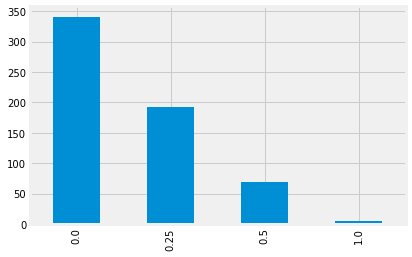

In [79]:
mri_1_norm.CDR.value_counts().plot(kind='bar');

In [80]:
mri_1_norm.groupby('CDR')[["Age", "SES", "MMSE", "eTIV", "nWBV", "ASF"]].mean()

,Age,SES,MMSE,eTIV,nWBV,ASF
CDR,,,,,,
0.00,0.630092,0.332845,0.968193,0.404137,0.531254,0.470314
0.25,0.676285,0.396373,0.849940,0.422701,0.394369,0.452519
0.50,0.659755,0.398551,0.665552,0.429215,0.294781,0.439756
1.00,0.781538,0.350000,0.546154,0.444766,0.264039,0.416596


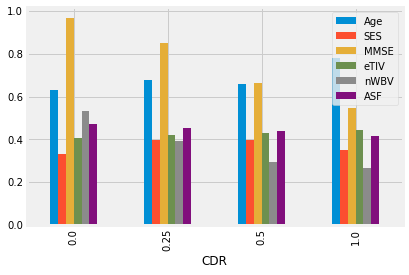

In [81]:
mri_1_norm.groupby('CDR')[["Age", "SES", "MMSE", "eTIV", "nWBV", "ASF"]].mean().plot(kind='bar');

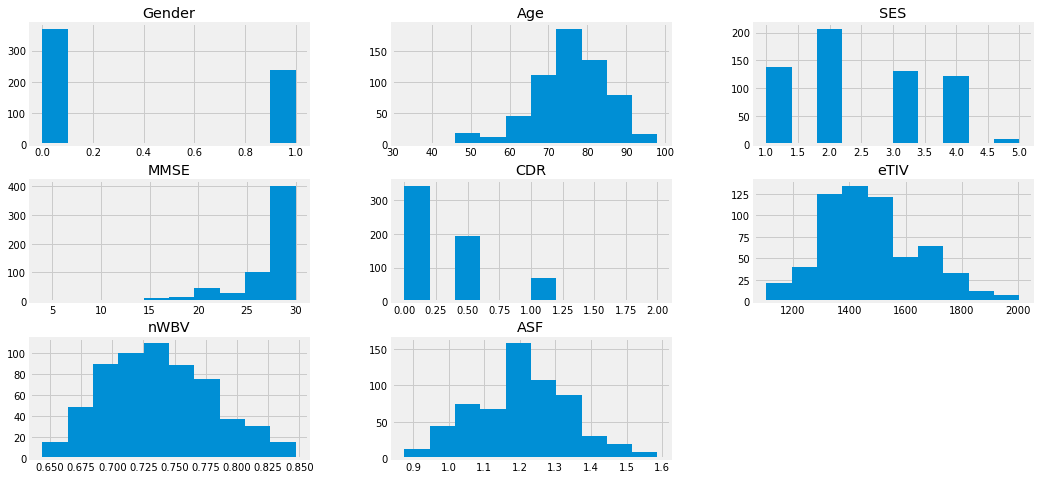

In [82]:
mri_1.hist(figsize=(16,8));

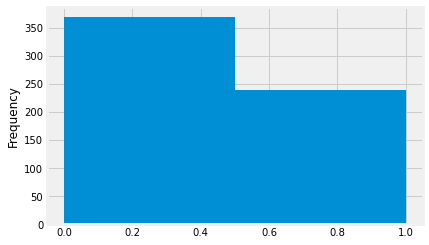

In [83]:
mri_1.Gender.plot(kind='hist', bins=2);

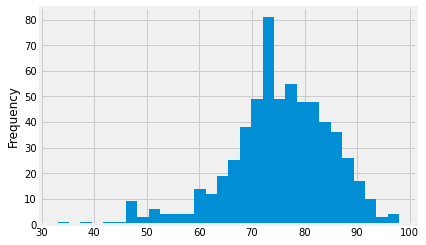

In [84]:
mri_1.Age.plot(kind='hist', bins=30);

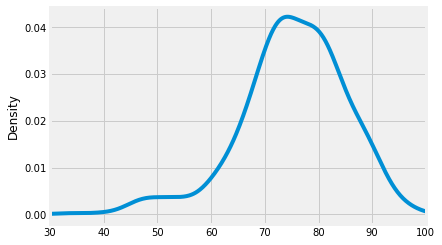

In [85]:
mri_1.Age.plot(kind='density', xlim=(30, 100));

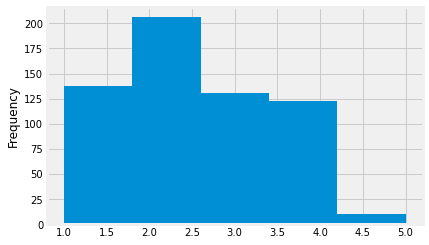

In [86]:
mri_1.SES.plot(kind='hist', bins=5);

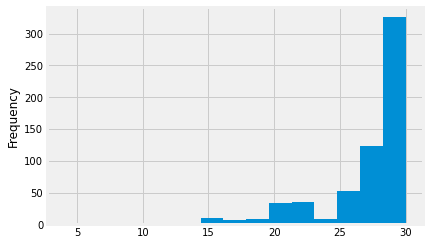

In [87]:
mri_1.MMSE.plot(kind='hist', bins=15);

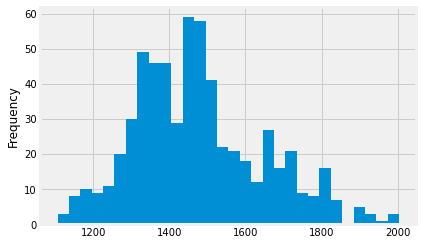

In [88]:
mri_1.eTIV.plot(kind='hist', bins=30);

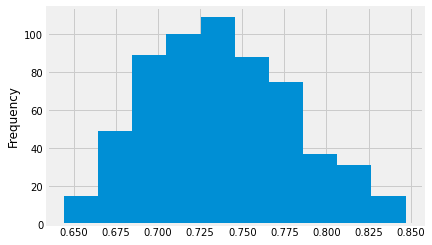

In [89]:
mri_1.nWBV.plot(kind='hist', bins=10);

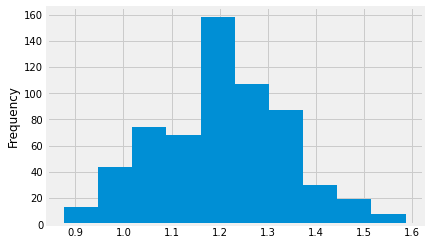

In [90]:
mri_1.ASF.plot(kind='hist', bins=10);

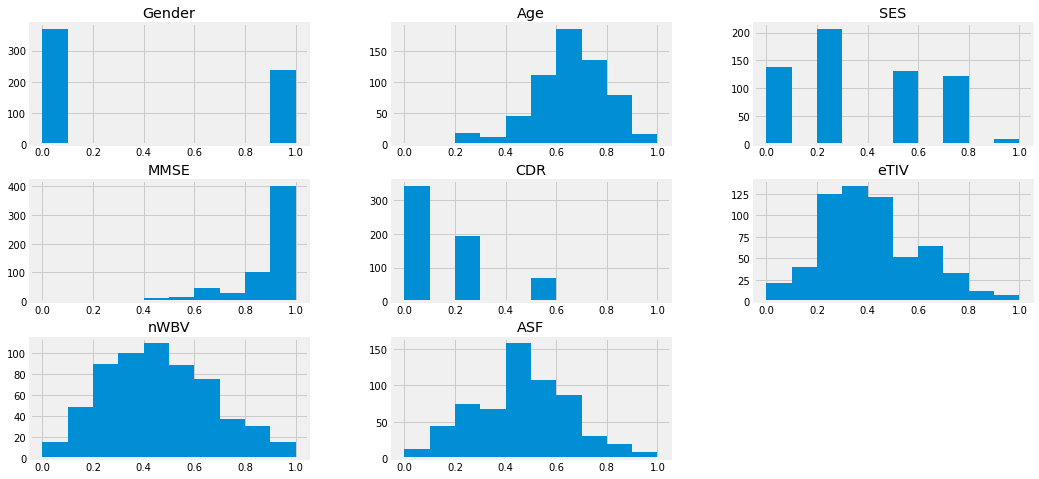

In [91]:
mri_1_norm.hist(figsize=(16,8));

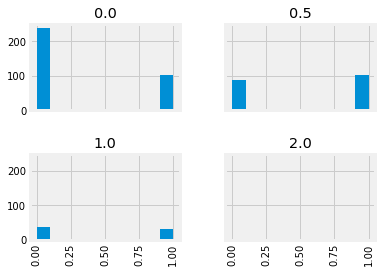

In [92]:
mri_1.hist(column='Gender', by='CDR', sharex=True, sharey=True, layout=(2, 2));

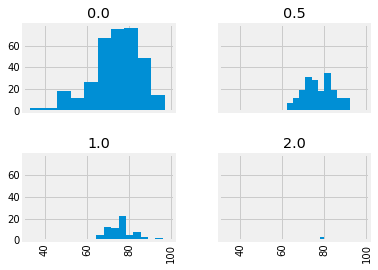

In [93]:
mri_1.hist(column='Age', by='CDR', sharex=True, sharey=True, layout=(2, 2));

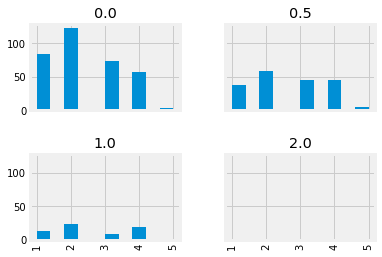

In [94]:
mri_1.hist(column='SES', by='CDR', sharex=True, sharey=True, layout=(2, 2));

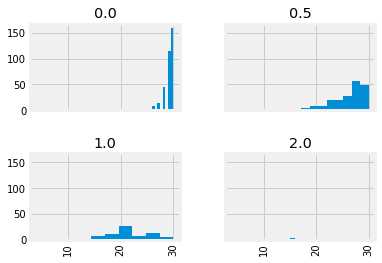

In [95]:
mri_1.hist(column='MMSE', by='CDR', sharex=True, sharey=True, layout=(2, 2));

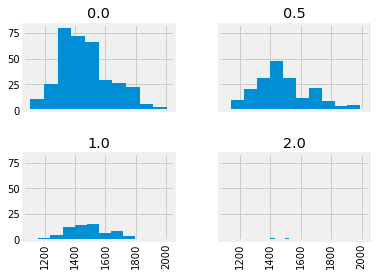

In [96]:
mri_1.hist(column='eTIV', by='CDR', sharex=True, sharey=True, layout=(2, 2));

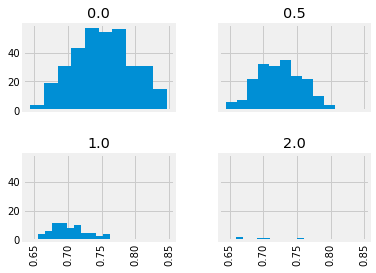

In [97]:
mri_1.hist(column='nWBV', by='CDR', sharex=True, sharey=True, layout=(2, 2));

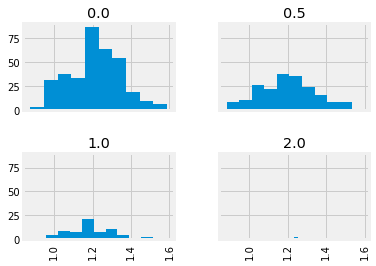

In [98]:
mri_1.hist(column='ASF', by='CDR', sharex=True, sharey=True, layout=(2, 2));

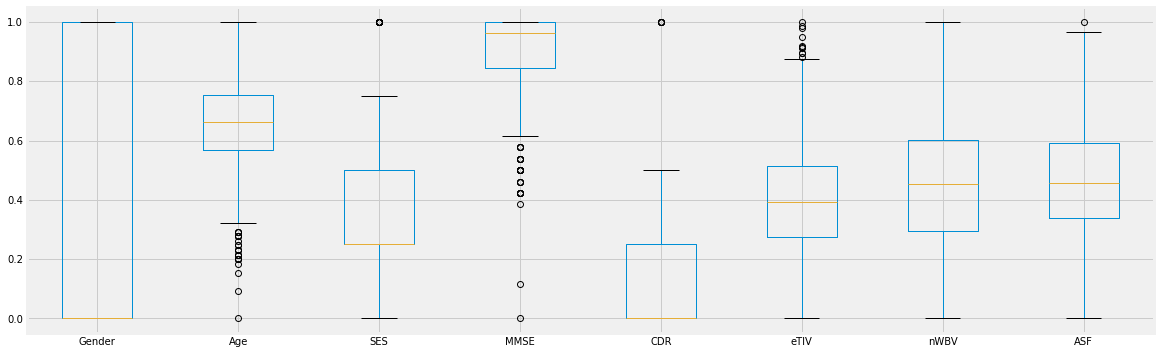

In [99]:
mri_1_norm.boxplot(figsize=(18,6));

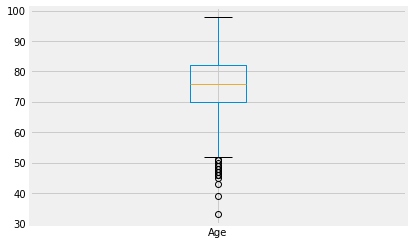

In [100]:
mri_1.Age.plot(kind="box");

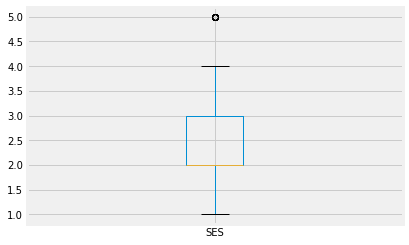

In [101]:
mri_1.SES.plot(kind="box");

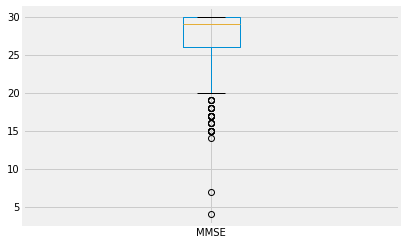

In [102]:
mri_1.MMSE.plot(kind="box");

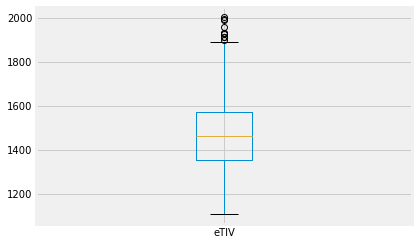

In [103]:
mri_1.eTIV.plot(kind="box");

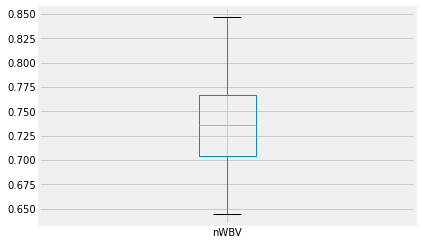

In [104]:
mri_1.nWBV.plot(kind="box");

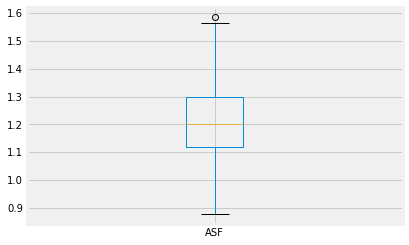

In [105]:
mri_1.ASF.plot(kind="box");

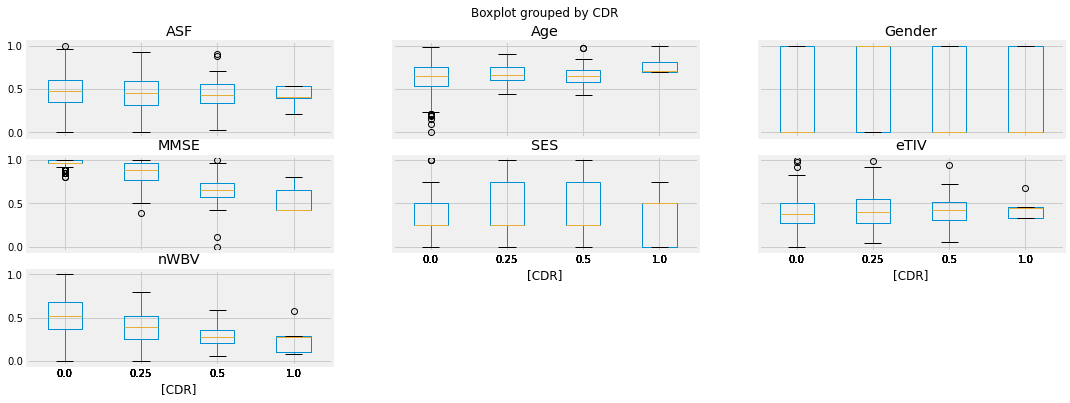

In [106]:
mri_1_norm.boxplot(by='CDR', figsize=(18,6));

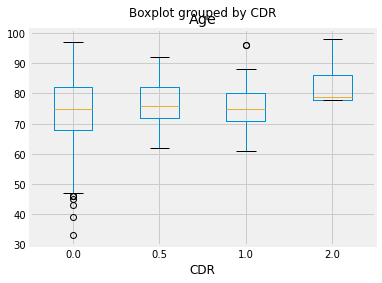

In [107]:
mri_1.boxplot(column="Age", by='CDR');

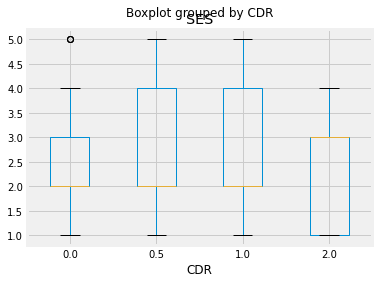

In [108]:
mri_1.boxplot(column="SES", by='CDR');

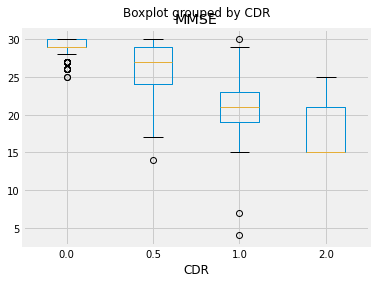

In [109]:
mri_1.boxplot(column="MMSE", by='CDR');

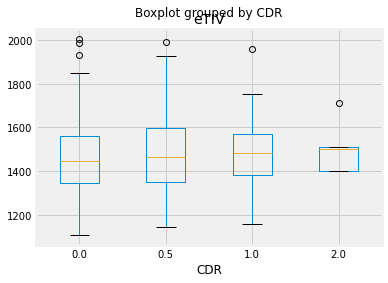

In [110]:
mri_1.boxplot(column="eTIV", by='CDR');

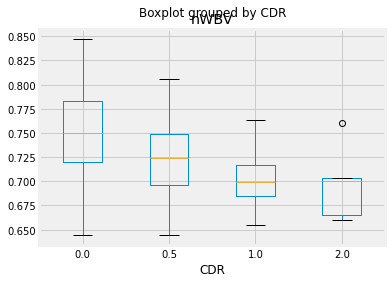

In [111]:
mri_1.boxplot(column="nWBV", by='CDR');

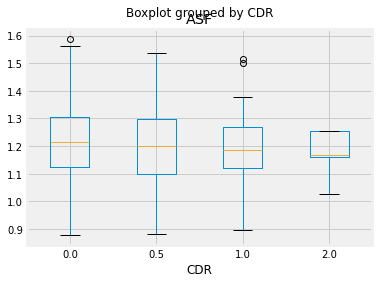

In [112]:
mri_1.boxplot(column="ASF", by='CDR');

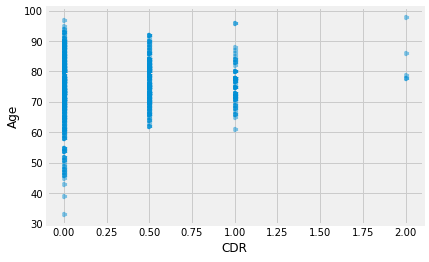

In [113]:
mri_1.plot(kind='scatter', x='CDR', y='Age', alpha=0.5, s = 20, marker = '3');

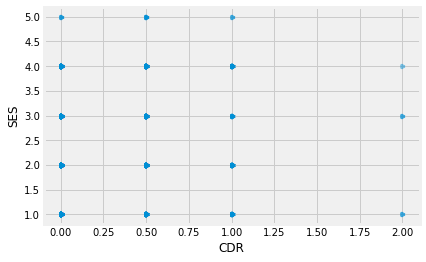

In [114]:
mri_1.plot(kind='scatter', x='CDR', y='SES', alpha=0.5, s = 20, marker = '3');

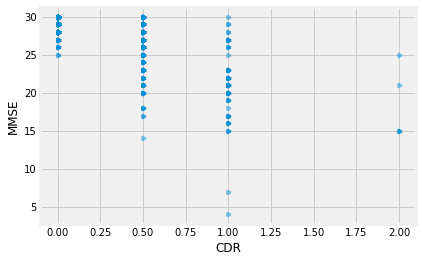

In [115]:
mri_1.plot(kind='scatter', x='CDR', y='MMSE', alpha=0.5, s = 20, marker = '3');

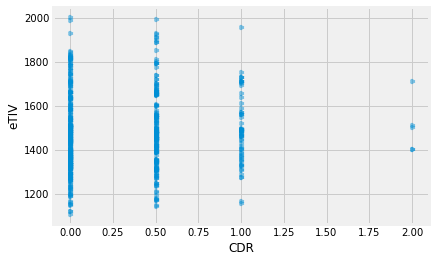

In [116]:
mri_1.plot(kind='scatter', x='CDR', y='eTIV', alpha=0.5, s = 20, marker = '3');

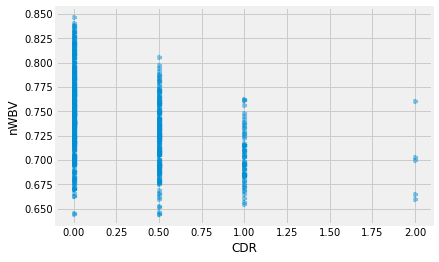

In [117]:
mri_1.plot(kind='scatter', x='CDR', y='nWBV', alpha=0.5, s = 20, marker = '3');

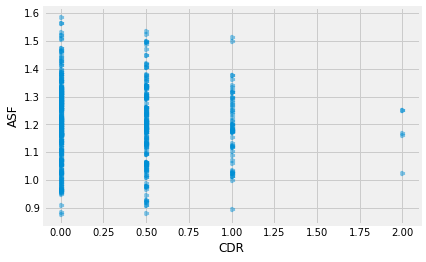

In [118]:
mri_1.plot(kind='scatter', x='CDR', y='ASF', alpha=0.5, s = 20, marker = '3');

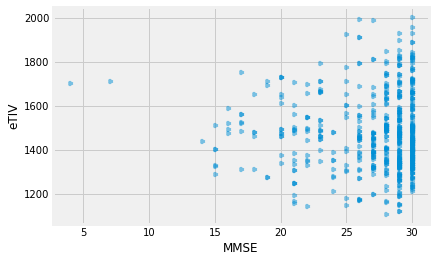

In [119]:
mri_1.plot(kind='scatter', x='MMSE', y='eTIV', alpha=0.5, s = 20, marker = '3');

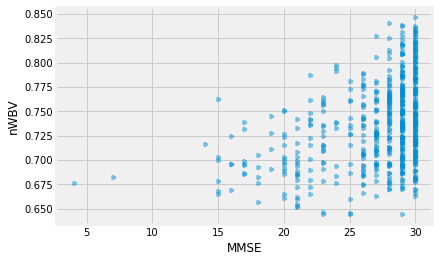

In [120]:
mri_1.plot(kind='scatter', x='MMSE', y='nWBV', alpha=0.5, s = 20, marker = '3');

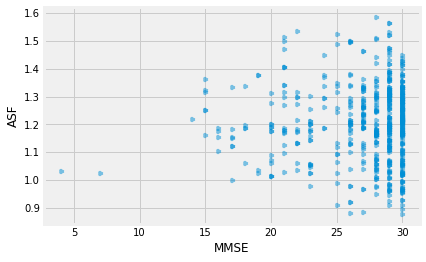

In [121]:
mri_1.plot(kind='scatter', x='MMSE', y='ASF', alpha=0.5, s = 20, marker = '3');

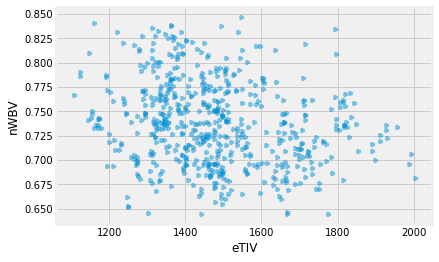

In [122]:
mri_1.plot(kind='scatter', x='eTIV', y='nWBV', alpha=0.5, s = 20, marker = '3');

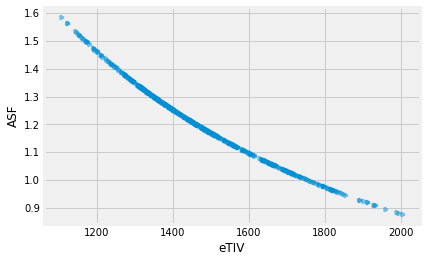

In [123]:
mri_1.plot(kind='scatter', x='eTIV', y='ASF', alpha=0.5, s = 20, marker = '3');

The variables "eTIV" and "ASF" seem to be highly correlated. We may need to drop one of them when creating our prediction models which assume independence of predictor variables. 

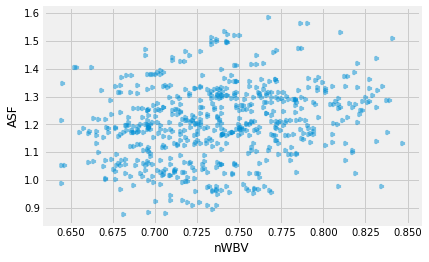

In [124]:
mri_1.plot(kind='scatter', x='nWBV', y='ASF', alpha=0.5, s = 20, marker = '3');

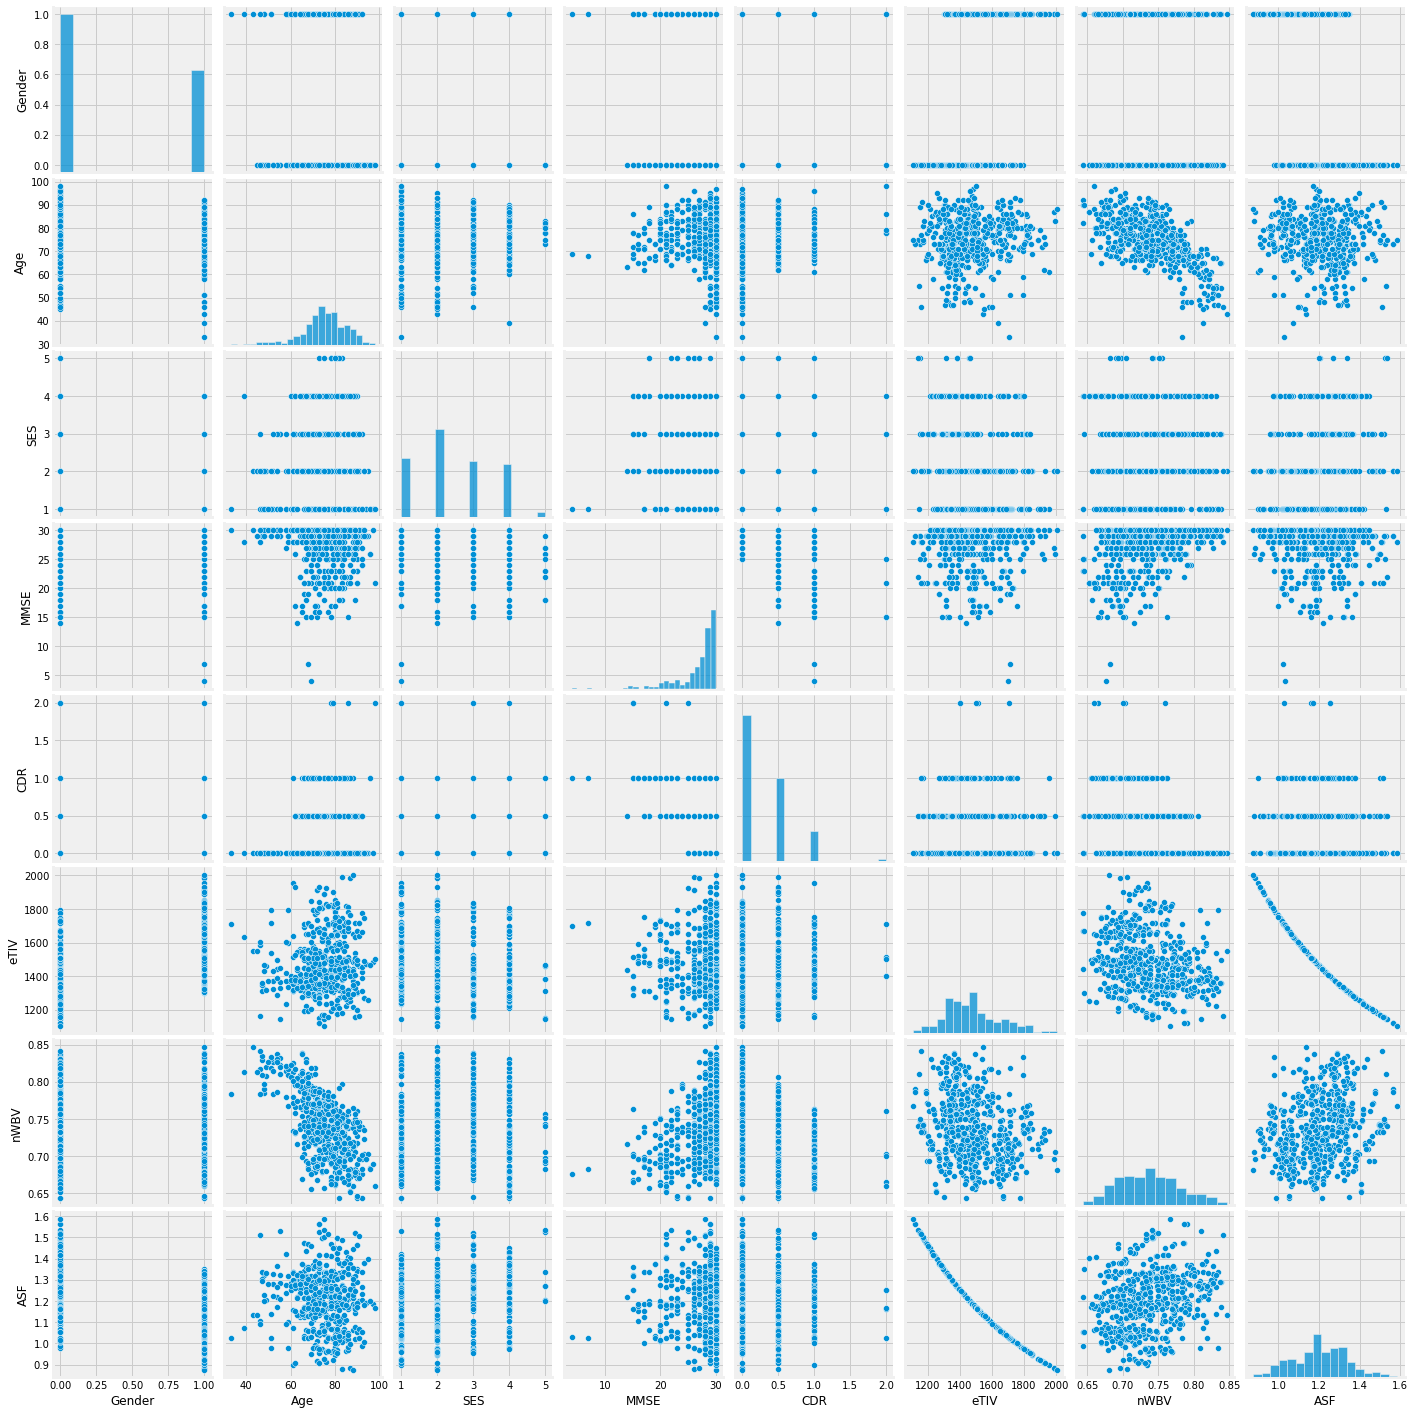

In [125]:
sns.pairplot(mri_1);

In [126]:
mri_1.corr()

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
Gender,1.000000,-0.007831,-0.051380,-0.102130,0.160721,0.569404,-0.205275,-0.558331
Age,-0.007831,1.000000,0.049548,-0.084834,0.133238,0.057413,-0.647799,-0.050130
SES,-0.051380,0.049548,1.000000,-0.159186,0.094744,-0.223176,0.007842,0.211437
MMSE,-0.102130,-0.084834,-0.159186,1.000000,-0.713990,-0.008678,0.375924,0.014269
CDR,0.160721,0.133238,0.094744,-0.713990,1.000000,0.053612,-0.404164,-0.061647
eTIV,0.569404,0.057413,-0.223176,-0.008678,0.053612,1.000000,-0.222960,-0.989135
nWBV,-0.205275,-0.647799,0.007842,0.375924,-0.404164,-0.222960,1.000000,0.224229
ASF,-0.558331,-0.050130,0.211437,0.014269,-0.061647,-0.989135,0.224229,1.000000


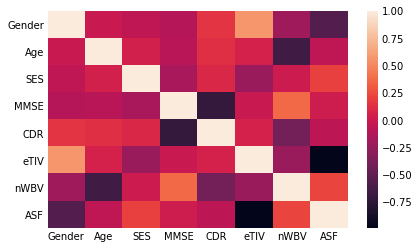

In [127]:
sns.heatmap(mri_1.corr());

In [128]:
mri_1.describe()

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.00000,608.000000
mean,0.393092,75.208882,2.442434,27.213816,0.288651,1477.062500,0.73713,1.203597
std,0.488839,9.865026,1.098138,3.699193,0.377697,170.653795,0.04267,0.135091
min,0.000000,33.000000,1.000000,4.000000,0.000000,1106.000000,0.64400,0.876000
25%,0.000000,70.000000,2.000000,26.000000,0.000000,1352.500000,0.70400,1.118000
50%,0.000000,76.000000,2.000000,29.000000,0.000000,1460.000000,0.73600,1.202000
75%,1.000000,82.000000,3.000000,30.000000,0.500000,1569.000000,0.76625,1.297500
max,1.000000,98.000000,5.000000,30.000000,2.000000,2004.000000,0.84700,1.587000


In [129]:
mri_1_norm.describe()

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,0.393092,0.649367,0.360609,0.892839,0.144326,0.413210,0.458768,0.460755
std,0.488839,0.151770,0.274534,0.142277,0.188849,0.190038,0.210198,0.190002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.569231,0.250000,0.846154,0.000000,0.274499,0.295567,0.340366
50%,0.000000,0.661538,0.250000,0.961538,0.000000,0.394209,0.453202,0.458509
75%,1.000000,0.753846,0.500000,1.000000,0.250000,0.515590,0.602217,0.592827
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
mri_1.CDR.value_counts(normalize=True)*100

0.0    56.085526
0.5    31.743421
1.0    11.348684
2.0     0.822368
Name: CDR, dtype: float64

## Outlier Handling

In the created boxplots, we have seen that we have some outliers. I will now look at those outliers more closely (I focus on outliers in variables when grouped by "CDR") and remove or fix them.

In [131]:
from statistics import stdev

def fix_outliers_std(x, strategy='3std', std_multiplier=3):
    std = stdev(x)
    upper_bound = x.mean()+3*std
    lower_bound = max(0,x.mean()-3*std)
    mask1 = x>upper_bound
    mask2 = x<lower_bound
    x = np.where(mask1,upper_bound,
                 np.where(mask2, lower_bound, x))
    return x

In [132]:
mri_cdr_0 = mri_1[mri_1["CDR"]==0.0]
mri_cdr_05 = mri_1[mri_1["CDR"]==0.5]
mri_cdr_1 = mri_1[mri_1["CDR"]==1.0]
mri_cdr_2 = mri_1[mri_1["CDR"]==2.0]

mri_cdr = [mri_cdr_0, mri_cdr_05, mri_cdr_1, mri_cdr_2]

for item in mri_cdr:
    for n,c in item.items():
        item[n] = fix_outliers_std(c, strategy='3std', std_multiplier=3)
        
mri_final = pd.concat([mri_cdr_0, mri_cdr_05, mri_cdr_1, mri_cdr_2], axis=0, ignore_index=True)

<ipython-input-132-544cc6301b25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item[n] = fix_outliers_std(c, strategy='3std', std_multiplier=3)
<ipython-input-132-544cc6301b25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item[n] = fix_outliers_std(c, strategy='3std', std_multiplier=3)
<ipython-input-132-544cc6301b25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [133]:
mri_final

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,74.0,3.0,29.0,0.0,1344.0,0.743,1.306
1,0.0,55.0,1.0,29.0,0.0,1147.0,0.810,1.531
2,1.0,74.0,2.0,30.0,0.0,1636.0,0.689,1.073
3,0.0,52.0,2.0,30.0,0.0,1321.0,0.827,1.329
4,0.0,81.0,2.0,30.0,0.0,1664.0,0.679,1.055
...,...,...,...,...,...,...,...,...
603,0.0,78.0,3.0,15.0,2.0,1401.0,0.703,1.253
604,1.0,86.0,4.0,15.0,2.0,1512.0,0.665,1.161
605,0.0,98.0,1.0,21.0,2.0,1503.0,0.660,1.168
606,0.0,78.0,3.0,15.0,2.0,1401.0,0.700,1.253


### I have fixed all outliers!!!

## The following datasets are ready to use for my analyses: They have been cleaned, explored and outliers have been removed!

In [134]:
mri_final.describe()

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.00000,608.000000
mean,0.393092,75.220787,2.442434,27.228685,0.288651,1477.001101,0.73713,1.203597
std,0.488839,9.818195,1.098138,3.652501,0.377697,170.471840,0.04267,0.135091
min,0.000000,39.619311,1.000000,7.117839,0.000000,1106.000000,0.64400,0.876000
25%,0.000000,70.000000,2.000000,26.151954,0.000000,1352.500000,0.70400,1.118000
50%,0.000000,76.000000,2.000000,29.000000,0.000000,1460.000000,0.73600,1.202000
75%,1.000000,82.000000,3.000000,30.000000,0.500000,1569.000000,0.76625,1.297500
max,1.000000,98.000000,5.000000,30.000000,2.000000,1992.000000,0.84700,1.587000


In [135]:
x = mri_final.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
mri_final_norm = pd.DataFrame(x_scaled)

In [136]:
mri_final_norm.rename(columns={0: "Gender", 1: "Age", 2: "SES", 3: "MMSE", 4: "CDR", 5: "eTIV", 6: "nWBV", 7: "ASF"}, inplace=True)

In [137]:
mri_final_norm.describe()

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,0.393092,0.609816,0.360609,0.878888,0.144326,0.418737,0.458768,0.460755
std,0.488839,0.168175,0.274534,0.159622,0.188849,0.192406,0.210198,0.190002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.520389,0.250000,0.831832,0.000000,0.278217,0.295567,0.340366
50%,0.000000,0.623163,0.250000,0.956298,0.000000,0.399549,0.453202,0.458509
75%,1.000000,0.725937,0.500000,1.000000,0.250000,0.522573,0.602217,0.592827
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
mri_final.corr()

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,ASF
Gender,1.000000,-0.006360,-0.051380,-0.102105,0.160721,0.569563,-0.205275,-0.558331
Age,-0.006360,1.000000,0.048472,-0.087511,0.132945,0.059133,-0.649484,-0.051921
SES,-0.051380,0.048472,1.000000,-0.163595,0.094744,-0.223189,0.007842,0.211437
MMSE,-0.102105,-0.087511,-0.163595,1.000000,-0.720915,-0.008481,0.377573,0.013825
CDR,0.160721,0.132945,0.094744,-0.720915,1.000000,0.053714,-0.404164,-0.061647
eTIV,0.569563,0.059133,-0.223189,-0.008481,0.053714,1.000000,-0.222851,-0.989332
nWBV,-0.205275,-0.649484,0.007842,0.377573,-0.404164,-0.222851,1.000000,0.224229
ASF,-0.558331,-0.051921,0.211437,0.013825,-0.061647,-0.989332,0.224229,1.000000


#### Now, I am ready to build prediction models with my data. As I have a continuous outcome variable, I first plan to create dump regressors, a statisticial linear regression, and then further prediction machine learning models (depending on the course content) and compare their prediction accuracy.

## Project (1): "CDR" as a Continuous Outcome Variable

## Project (1): Dump Regressor Models

Because the variables "eTIV" and "ASF" are highly correlated, we now drop "ASF" from our datasets:

In [139]:
mri_final.drop("ASF", axis=1, inplace=True)

### Assign our dependent (y) and independent variables (X):

In [140]:
X = mri_final.drop('CDR', axis=1)
y = mri_final.CDR

### Dump Regressor (Mean)

For our first model, I will predict "CDR" values with the CDR-Mean:

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())

#### Accuracy:

In [142]:
from sklearn import metrics
mean_mae = np.round(metrics.mean_absolute_error(y_test, y_null),2)
mean_mse = np.round(metrics.mean_squared_error(y_test, y_null),2)
mean_rmse = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_null)),2)

In [143]:
prediction_accuracy = pd.DataFrame([[mean_mae], [mean_mse], [mean_rmse]], columns=['Mean'], index =['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

In [144]:
prediction_accuracy

,Mean
Mean Absolute Error,0.33
Mean Squared Error,0.16
Root Mean Squared Error,0.40


This is our baseline prediction model and our current "Champion"! I will compare future models against these metrics.

### Dump Regressor (Median)

For my second model, I will predict "CDR" by the "CDR"-Median:

In [145]:
y_null.fill(y_test.median())

#### Accuracy:

In [146]:
median_mae = np.round(metrics.mean_absolute_error(y_test, y_null),2)
median_mse = np.round(metrics.mean_squared_error(y_test, y_null),2)
median_rmse = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_null)),2)

In [147]:
median_prediction_accuracy = pd.DataFrame([[median_mae], [median_mse], [median_rmse]], columns=['Median'], index =['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])
prediction_accuracy = pd.concat([prediction_accuracy, median_prediction_accuracy], axis=1)

In [148]:
prediction_accuracy

,Mean,Median
Mean Absolute Error,0.33,0.25
Mean Squared Error,0.16,0.22
Root Mean Squared Error,0.40,0.47


We can now see (based on the RMSE) that the Mean Model is better at predicting our "CDR" values than the "Median" Model and remains our current Champion.

## Project (1): Linear Regression (Statsmodels)

In [149]:
X = mri_final.drop("CDR", axis=1)

In [150]:
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

In [151]:
y = mri_final["CDR"].values

In [152]:
import statsmodels.api as sm

model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


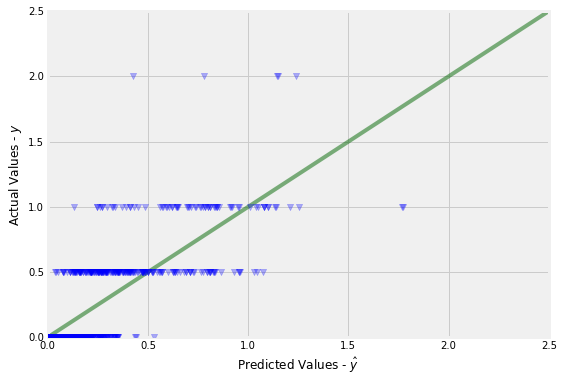

In [153]:
chart_xlim = 2.5
chart_ylim = 2.5

plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=40, c=(0,0,1,0.3), marker='v', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")

axes = plt.gca()
axes.set_xlim([0,2.5])
axes.set_ylim([0,2.5])

plt.plot(range(0,100), range(0,100), c=(0,0.4,0,0.5))

plt.show();

In [154]:
model.params

array([ 6.06690598e-02, -1.17643242e-03, -4.59288450e-03, -6.76705578e-02,
       -7.82112660e-05, -1.49222973e+00,  3.42257844e+00])

In [155]:
list(zip(mri_final.drop("CDR", axis=1).columns, model.params))

[('Gender', 0.060669059778280264),
 ('Age', -0.001176432422863127),
 ('SES', -0.004592884500535033),
 ('MMSE', -0.06767055775230107),
 ('eTIV', -7.82112659760333e-05),
 ('nWBV', -1.4922297259908355)]

In [156]:
col_names = list(mri_final.select_dtypes(include="number").drop("CDR", axis=1).columns) + ['y_intercept']

In [157]:
model.summary(xname=col_names)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     120.1
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           1.91e-99
Time:                        11:54:22   Log-Likelihood:                -30.641
No. Observations:                 608   AIC:                             75.28
Df Residuals:                     601   BIC:                             106.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender          0.0607      0.026      2.296      0.022       0.009       0.113
Age            -0.0012      0.001     -0.805      0.421      -0.004       0.002
SES            -0.0046      0.010     -0.463      0.644      -0.024       0.015
MMSE           -0.0677      0.003    -20.962      0.000      -0.074      -0.061
eTIV        -7.821e-05   7.73e-05     -1.012      0.312      -0.000    7.35e-05
nWBV           -1.4922      0.371     -4.018      0.000      -2.222      -0.763
y_intercept     3.4226      0.362      9.447      0.000       2.711       4.134
==============================================================================
Omnibus:                      153.940   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.534
Skew:                           1.207   Prob(JB):                    2.99e-102
Kurtosis:                       6.553   Cond. No.                     7.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### My linear regression model explains 54.5% of the variance in "CDR" scores, which is acceptable! However, a current problem in my data may be how my "CDR" variable is set up. Another possibility is to treat "CDR" as a categorical variable and run classification models (I will still apply a Linear Regression for practice :)).

## Project (1): Linear Regression (Scikitlearn)

In [158]:
feature_cols = mri_final.columns.tolist()
feature_cols.remove("CDR")
print(feature_cols)

['Gender', 'Age', 'SES', 'MMSE', 'eTIV', 'nWBV']


In [159]:
X = mri_final[feature_cols]
y = mri_final.CDR

In [160]:
print(X.shape)
print(y.shape)

(608, 6)
(608,)


### Train-Test Split:

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [163]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((456, 6), (152, 6), (456,), (152,))

### Import:

In [164]:
from sklearn.linear_model import LinearRegression

### Instantiate:

In [165]:
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

### Fit:

In [166]:
lr.fit(X_train, y_train)

LinearRegression()

### Predict:

In [167]:
y_pred = lr.predict(X_test)

### Accuracy:

In [168]:
lr_mae = np.round(metrics.mean_absolute_error(y_test, y_pred),2)
lr_mse = np.round(metrics.mean_squared_error(y_test, y_pred),2)
lr_rmse = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)

In [169]:
lr_prediction_accuracy = pd.DataFrame([[lr_mae], [lr_mse], [lr_rmse]], columns=['Linear Regression'], index =['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])
prediction_accuracy = pd.concat([prediction_accuracy, lr_prediction_accuracy], axis=1)

In [170]:
prediction_accuracy

,Mean,Median,Linear Regression
Mean Absolute Error,0.33,0.25,0.20
Mean Squared Error,0.16,0.22,0.07
Root Mean Squared Error,0.40,0.47,0.26


My Linear Regression Model is better at predicting dementia severity than when using the mean or the median! 

## Project (1): "CDR" as a Categorical Outcome Variable

In [171]:
pd.DataFrame(mri_final.dtypes, columns=['Type']).T

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV
Type,float64,float64,float64,float64,float64,float64,float64


In [172]:
mri_final['CDR_cat'] = mri_final.CDR.astype('str')

In [173]:
mri_final.columns

Index(['Gender', 'Age', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'CDR_cat'], dtype='object')

## Project (1): Dump Classifier Models

### Assign our dependent (y) and independent variables (X):

In [174]:
X = mri_final.drop("CDR", axis=1).drop("CDR_cat", axis=1)
y = mri_final.CDR_cat

### Dump Classifier (Chance)

For our first model, I will predict "CDR" classification by chance:

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_null = np.zeros_like(y_test, dtype=str)

In [176]:
mri_final.CDR_cat.unique()

array(['0.0', '0.5', '1.0', '2.0'], dtype=object)

In [177]:
y_null = [np.random.choice(["0.0", "0.5", "1.0", "2.0"]) for i in np.arange(len(y_null))]

In [178]:
y_null = pd.DataFrame(y_null)
y_test1 = pd.DataFrame(y_test).reset_index()
y_pred = pd.concat([y_null, y_test1], axis=1)
y_pred.rename(columns={0: "y_null", "CDR_cat": "y_test"}, inplace=True)

#### Accuracy:

In [179]:
chance_probability = len(y_pred[y_pred.y_null==y_pred.y_test])/len(y_pred)*100

In [180]:
prediction_accuracy = pd.DataFrame([[chance_probability]], columns=['Chance'], index =['Probability'])

In [181]:
prediction_accuracy

,Chance
Probability,30.921053


This is our baseline prediction model and our current "Champion"! I will compare future models against this metric.

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.71      0.25      0.37        99
         0.5       0.36      0.44      0.39        34
         1.0       0.18      0.35      0.24        17
         2.0       0.02      0.50      0.05         2

    accuracy                           0.31       152
   macro avg       0.32      0.39      0.26       152
weighted avg       0.57      0.31      0.36       152



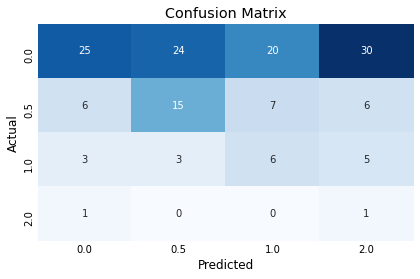

In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_pred["y_test"], y_pred["y_null"])
clr = classification_report(y_pred["y_test"], y_pred["y_null"])

ax = plt.subplot()
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["0.0", "0.5", "1.0", "2.0"])
ax.yaxis.set_ticklabels(["0.0", "0.5", "1.0", "2.0"])

print("Classification Report:\n----------------------\n", clr)

In [183]:
from sklearn.metrics import f1_score

In [184]:
chance_macro = f1_score(y_pred["y_test"], y_pred["y_null"], average='macro')

In [185]:
df_chance_macro = pd.DataFrame([[chance_macro]], columns=['Chance'], index =['Macro F1'])

In [186]:
prediction_accuracy = pd.concat([prediction_accuracy, df_chance_macro], axis=0)

In [187]:
prediction_accuracy

,Chance
Probability,30.921053
Macro F1,0.263331


Our aim is to increase "Probability" and the "Macro F1 Score" with future models!

### Dump Classifier (Mode)

For my second model, I will predict "Dementia" by the "Dementia" mode:

In [188]:
y_train.value_counts()

0.0    242
0.5    159
1.0     52
2.0      3
Name: CDR_cat, dtype: int64

Our mode is "0.0".

In [189]:
y_null = np.zeros_like(y_test, dtype=str)

In [190]:
y_null = [["0.0"] for i in np.arange(len(y_null))]

In [191]:
y_null = pd.DataFrame(y_null)
y_test2 = pd.DataFrame(y_test).reset_index()
y_pred = pd.concat([y_null, y_test2], axis=1)
y_pred.rename(columns={0: "y_null", "CDR_cat": "y_test"}, inplace=True)

#### Accuracy:

In [192]:
mode_probability = len(y_pred[y_pred.y_null==y_pred.y_test])/len(y_pred)*100

In [193]:
df_mode_probability = pd.DataFrame([[mode_probability]], columns=['Mode'], index =['Probability'])

C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        99
         0.5       0.00      0.00      0.00        34
         1.0       0.00      0.00      0.00        17
         2.0       0.00      0.00      0.00         2

    accuracy                           0.65       152
   macro avg       0.16      0.25      0.20       152
weighted avg       0.42      0.65      0.51       152



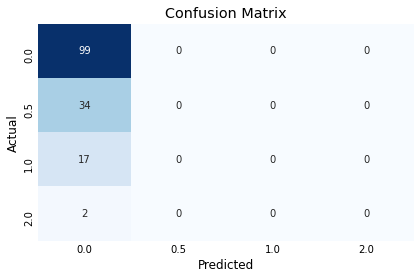

In [194]:
cm = confusion_matrix(y_pred["y_test"], y_pred["y_null"])
clr = classification_report(y_pred["y_test"], y_pred["y_null"])

ax = plt.subplot()
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["0.0", "0.5", "1.0", "2.0"])
ax.yaxis.set_ticklabels(["0.0", "0.5", "1.0", "2.0"])

print("Classification Report:\n----------------------\n", clr)

In [195]:
mode_macro = f1_score(y_pred["y_test"], y_pred["y_null"], average='macro')

In [196]:
df_mode_macro = pd.DataFrame([[mode_macro]], columns=['Mode'], index =['Macro F1'])

In [197]:
df_mode = pd.concat([df_mode_probability, df_mode_macro], axis=0)

In [198]:
prediction_accuracy = pd.concat([prediction_accuracy, df_mode], axis=1)

In [199]:
prediction_accuracy

,Chance,Mode
Probability,30.921053,65.131579
Macro F1,0.263331,0.197211


While our probability increased with our Mode model, the Macro F1 score decreased! So, we need to continue building better models!

## Project (1): Logistic Regression

In [200]:
feature_cols = mri_final.columns.tolist()
feature_cols.remove("CDR")
feature_cols.remove("CDR_cat")
print(feature_cols)

['Gender', 'Age', 'SES', 'MMSE', 'eTIV', 'nWBV']


In [201]:
X = mri_final[feature_cols]
y = mri_final.CDR_cat

### Train-Test Split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [203]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((456, 6), (152, 6), (456,), (152,))

### Import:

In [204]:
from sklearn.linear_model import LogisticRegression

### Instantiate:

In [205]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

### Fit:

In [206]:
logreg.fit(X_train, y_train)

C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

### Predict:

In [207]:
y_pred = logreg.predict(X_test)

### Accuracy:

In [208]:
logreg_probability = len(y_pred[y_pred==y_test])/len(y_pred)*100

In [209]:
df_logreg_probability = pd.DataFrame([[logreg_probability]], columns=['Logistic Regression'], index =['Probability'])

C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        99
         0.5       0.39      0.41      0.40        34
         1.0       0.50      0.35      0.41        17
         2.0       0.00      0.00      0.00         2

    accuracy                           0.68       152
   macro avg       0.42      0.40      0.41       152
weighted avg       0.67      0.68      0.67       152



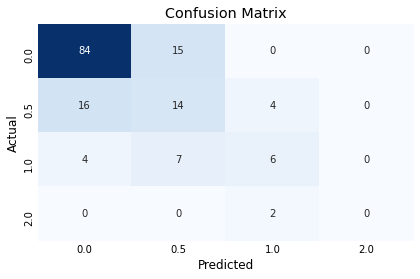

In [210]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["0.0", "0.5", "1.0", "2.0"])
ax.yaxis.set_ticklabels(["0.0", "0.5", "1.0", "2.0"])

print("Classification Report:\n----------------------\n", clr)

In [211]:
logreg_macro = f1_score(y_test, y_pred, average='macro')

In [212]:
df_logreg_macro = pd.DataFrame([[logreg_macro]], columns=['Logistic Regression'], index =['Macro F1'])

In [213]:
df_logreg = pd.concat([df_logreg_probability, df_logreg_macro], axis=0)

In [214]:
prediction_accuracy = pd.concat([prediction_accuracy, df_logreg], axis=1)

In [215]:
prediction_accuracy

,Chance,Mode,Logistic Regression
Probability,30.921053,65.131579,68.421053
Macro F1,0.263331,0.197211,0.410345


Both our probability and especially our macro F1 score have increased, making our "Logistic Regression" Model our new champion!

## Project (1): Random Forests

In [216]:
feature_cols

['Gender', 'Age', 'SES', 'MMSE', 'eTIV', 'nWBV']

In [217]:
X = mri_final[feature_cols]
y = mri_final.CDR_cat

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

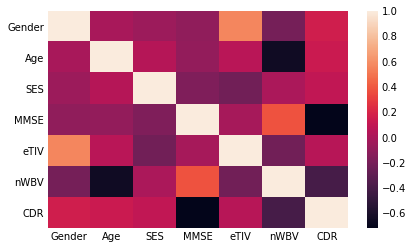

In [219]:
import seaborn as sns
sns.heatmap(mri_final[feature_cols+['CDR']].corr());

### Accuracy (R-Squared):

In [220]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train,y_train)
print ("Training Score:",model.score(X_train,y_train))
print ("Test Score:",model.score(X_test,y_test))

Training Score: 1.0
Test Score: 0.8486842105263158


### Feature Importance:

In [221]:
def get_feature_importance(model, features):
    return pd.DataFrame({'features':features, 'imp':model.feature_importances_}
                       ).sort_values('imp', ascending=True)

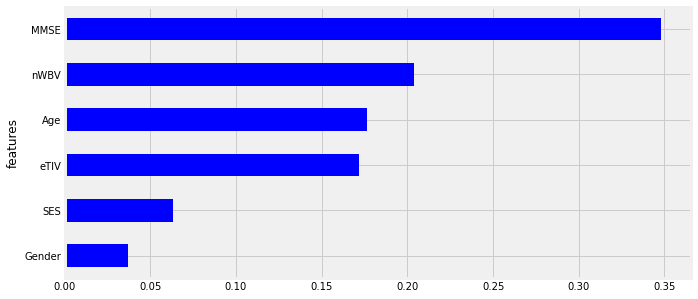

In [222]:
df_fi = get_feature_importance(model, feature_cols)
df_fi.plot('features', 'imp', 'barh', figsize=(10,5), color='b', legend=False);

### Improving Our Model:

In [223]:
dict_results={}; 
for max_feat in np.arange(1,6):
    for min_leaf in np.arange(1,5):
            for max_dep in np.arange(1,20):
                model = RandomForestClassifier(n_estimators=100,
                                               min_samples_leaf=min_leaf,
                                               max_features=max_feat,
                                               max_depth=max_dep,
                                               random_state=42,
                                               n_jobs=-1)
                model.fit(X_train,y_train)
                dict_results[(max_feat, min_leaf, max_dep)]=model.score(X_test,y_test)

In [224]:
pd.DataFrame.from_dict(dict_results, orient='index').sort_values(by=0,ascending=False).head()

,0
"(1, 1, 14)",0.868421
"(1, 1, 15)",0.868421
"(1, 1, 16)",0.861842
"(1, 1, 17)",0.861842
"(1, 1, 19)",0.861842


### Testing our Final Model:

### Accuracy (R-Squared):

In [225]:
model = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=1,
                                max_features=1,
                                max_depth=14,
                                random_state=42,
                                n_jobs=-1)
model.fit(X_train,y_train)
print ("Training Score:",model.score(X_train,y_train))
print ("Test Score:",model.score(X_test,y_test))

Training Score: 1.0
Test Score: 0.868421052631579


### Feature Importance:

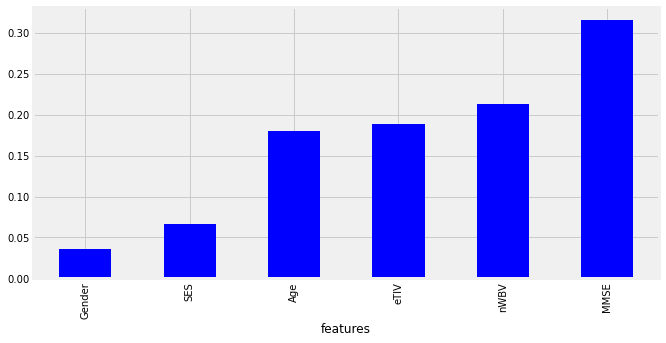

In [226]:
df_fi = get_feature_importance(model, feature_cols)
df_fi.plot('features', 'imp', 'bar', figsize=(10,5), color='b', legend=False);

### Accuracy:

In [227]:
y_pred = model.predict(X_test)

In [228]:
rf_probability = len(y_pred[y_pred==y_test])/len(y_pred)*100

In [229]:
df_rf_probability = pd.DataFrame([[rf_probability]], columns=['Random Forest'], index =['Probability'])

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93        99
         0.5       0.71      0.79      0.75        34
         1.0       0.85      0.65      0.73        17
         2.0       1.00      0.50      0.67         2

    accuracy                           0.87       152
   macro avg       0.87      0.72      0.77       152
weighted avg       0.87      0.87      0.87       152



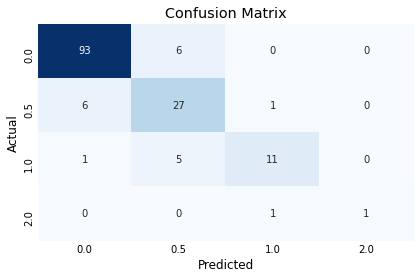

In [230]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["0.0", "0.5", "1.0", "2.0"])
ax.yaxis.set_ticklabels(["0.0", "0.5", "1.0", "2.0"])

print("Classification Report:\n----------------------\n", clr)

In [231]:
rf_macro = f1_score(y_test, y_pred, average='macro')

In [232]:
df_rf_macro = pd.DataFrame([[rf_macro]], columns=['Random Forest'], index =['Macro F1'])

In [233]:
df_rf = pd.concat([df_rf_probability, df_rf_macro], axis=0)

In [234]:
prediction_accuracy = pd.concat([prediction_accuracy, df_rf], axis=1)

In [235]:
prediction_accuracy

,Chance,Mode,Logistic Regression,Random Forest
Probability,30.921053,65.131579,68.421053,86.842105
Macro F1,0.263331,0.197211,0.410345,0.771168


We have substantially increased both the probability and our macro F1 score, and our optimizes prediction model! 

Our most important predictor variable is MMSE, followed by nWBV, eTIV and Age. SES and Gender does not seem to add much to our model.

In [236]:
plot = prediction_accuracy.T

In [237]:
plot

,Probability,Macro F1
Chance,30.921053,0.263331
Mode,65.131579,0.197211
Logistic Regression,68.421053,0.410345
Random Forest,86.842105,0.771168


In [238]:
plot["Probability"] = plot["Probability"].div(100)

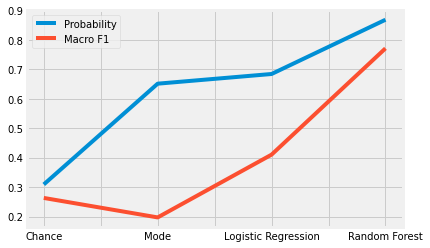

In [239]:
plot.plot();

## Project (2): Creating and Exploring the Final Dataset

My aim is to test whether we can use data derived from MRI images and some additional demographic variables to accurately predict later dementia onset. For this purpose, I will use my longitudinal dataset but only the data of a patient's first visit.

### Creating the Final Dataset

In [240]:
mri_2 = df_mri_l[df_mri_l["Visit"]==1.0]

In [241]:
type(mri_2)

pandas.core.frame.DataFrame

In [242]:
mri_2.sample(5)

,Subject ID,Dementia Group,Visit,MR Delay,Gender,Age,Education,SES,MMSE,CDR,eTIV,nWBV,ASF
MRI ID,,,,,,,,,,,,,
OAS2_0023_MR1,OAS2_0023,Demented,1,0,0,86,12,4.0,21.0,0.5,1247,0.662,1.407
OAS2_0119_MR1,OAS2_0119,Nondemented,1,0,0,81,15,2.0,28.0,0.0,1486,0.754,1.181
OAS2_0145_MR1,OAS2_0145,Converted,1,0,0,68,16,3.0,30.0,0.0,1298,0.799,1.352
OAS2_0149_MR1,OAS2_0149,Nondemented,1,0,0,81,13,2.0,29.0,0.0,1345,0.737,1.305
OAS2_0050_MR1,OAS2_0050,Demented,1,0,1,71,12,4.0,20.0,0.5,1461,0.724,1.202


In [243]:
mri_2.shape

(150, 13)

### Editing the Final Dataset

In [244]:
mri_2.columns

Index(['Subject ID', 'Dementia Group', 'Visit', 'MR Delay', 'Gender', 'Age',
       'Education', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

#### Deleting (Now) Irrelevant Columns:

We retained some variables to help us filter out the inital scans of each patient. Now, we can delete those columns as they do not have further relevance.

In [245]:
mri_2.drop(["Subject ID", "Visit", "MR Delay"], axis=1, inplace=True)

C:\Users\lenav\ANACONDA\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### The "CDR" Variable:

For this project, I want to predict "Dementia Group", which has been derived from the variable "CDR". Therefore, I will drop the column "CDR" as we cannot use it in our prediction model.

In [246]:
mri_2.drop("CDR", axis=1, inplace=True)

### Exploring and "Double-Checking" the Dataset

In [247]:
mri_2.sample(5)

,Dementia Group,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
MRI ID,,,,,,,,,
OAS2_0157_MR1,Demented,0,73,12,2.0,19.0,1274,0.728,1.377
OAS2_0109_MR1,Nondemented,1,81,11,4.0,28.0,1750,0.670,1.003
OAS2_0172_MR1,Demented,1,75,16,1.0,30.0,1891,0.709,0.928
OAS2_0030_MR1,Nondemented,0,60,18,1.0,30.0,1402,0.822,1.252
OAS2_0049_MR1,Nondemented,0,69,16,3.0,30.0,1491,0.794,1.177


In [248]:
mri_2.shape

(150, 9)

In [249]:
mri_2.columns

Index(['Dementia Group', 'Gender', 'Age', 'Education', 'SES', 'MMSE', 'eTIV',
       'nWBV', 'ASF'],
      dtype='object')

In [250]:
pd.DataFrame(mri_2.dtypes, columns=['Type']).T

,Dementia Group,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
Type,object,int64,int64,int64,float64,float64,int64,float64,float64


In [251]:
df_null = pd.DataFrame(mri_2.isnull().sum(), columns=['Count of Nulls'])
df_null.index.name = 'Column'
df_null.T

Column,Dementia Group,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
Count of Nulls,0,0,0,0,0,0,0,0,0


### The final dataset for Project 2 is cleaned and ready to go!

## Project (2): Exploratory Data Analyses

In [252]:
mri_2.describe()

,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
count,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000
mean,0.413333,75.446667,14.533333,2.466667,27.56000,1474.426667,0.736073,1.206333
std,0.494081,7.545421,2.874714,1.103178,2.96847,174.683889,0.036458,0.137864
min,0.000000,60.000000,6.000000,1.000000,17.00000,1123.000000,0.660000,0.883000
25%,0.000000,70.000000,12.000000,2.000000,26.00000,1347.250000,0.710000,1.121000
50%,0.000000,75.000000,14.000000,2.000000,29.00000,1453.500000,0.735000,1.207500
75%,1.000000,80.000000,16.000000,3.000000,30.00000,1565.250000,0.757750,1.302750
max,1.000000,96.000000,23.000000,5.000000,30.00000,1987.000000,0.837000,1.563000


In [253]:
mri_2.rename(columns={"Dementia Group": "Dementia"}, inplace=True)

C:\Users\lenav\ANACONDA\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [254]:
mri_2.Dementia.value_counts()

Nondemented    72
Demented       64
Converted      14
Name: Dementia, dtype: int64

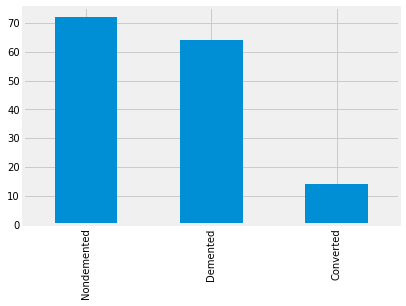

In [255]:
mri_2.Dementia.value_counts().plot(kind='bar');

In [256]:
mri_2.groupby('Dementia')[["Age", "Education", "SES", "MMSE", "eTIV", "nWBV", "ASF"]].mean()

,Age,Education,SES,MMSE,eTIV,nWBV,ASF
Dementia,,,,,,,
Converted,77.071429,15.142857,1.857143,29.357143,1438.285714,0.737786,1.229429
Demented,75.109375,13.687500,2.656250,25.328125,1475.937500,0.724391,1.204719
Nondemented,75.430556,15.166667,2.416667,29.194444,1480.111111,0.746125,1.203278


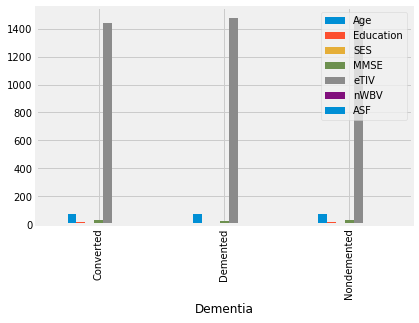

In [257]:
mri_2.groupby('Dementia')[["Age", "Education", "SES", "MMSE", "eTIV", "nWBV", "ASF"]].mean().plot(kind='bar');

The range of our scores differ substantially. One way to resolve this is to look at our variables seperately:

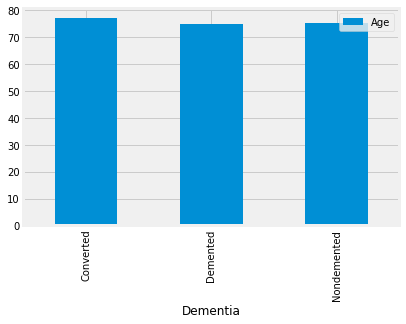

In [258]:
mri_2.groupby('Dementia')[["Age"]].mean().plot(kind='bar');

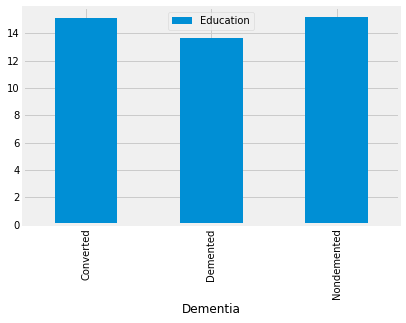

In [259]:
mri_2.groupby('Dementia')[["Education"]].mean().plot(kind='bar');

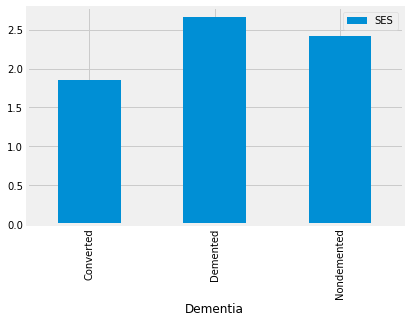

In [260]:
mri_2.groupby('Dementia')[["SES"]].mean().plot(kind='bar');

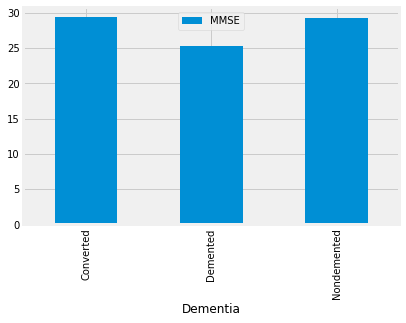

In [261]:
mri_2.groupby('Dementia')[["MMSE"]].mean().plot(kind='bar');

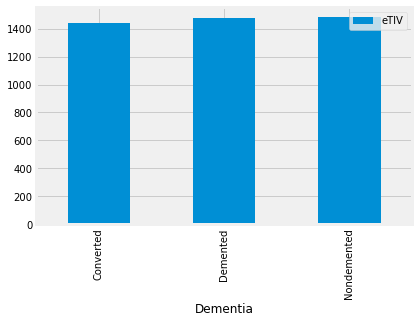

In [262]:
mri_2.groupby('Dementia')[["eTIV"]].mean().plot(kind='bar');

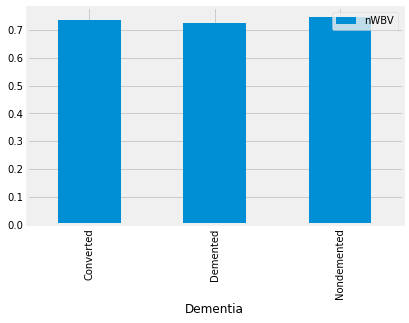

In [263]:
mri_2.groupby('Dementia')[["nWBV"]].mean().plot(kind='bar');

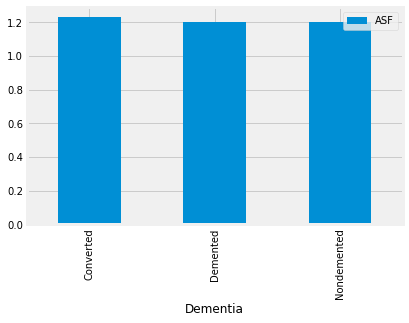

In [264]:
mri_2.groupby('Dementia')[["ASF"]].mean().plot(kind='bar');

Another way is to normalize the data. This might also be useful for building better prediction models:

In [265]:
pd.DataFrame(mri_2.dtypes, columns=["Type"]).T

,Dementia,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
Type,object,int64,int64,int64,float64,float64,int64,float64,float64


In [266]:
mri_num = mri_2.select_dtypes(include="number")
mri_obj = mri_2.select_dtypes(include="object")

In [267]:
from sklearn import preprocessing

x = mri_num.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
mri_2_numnorm = pd.DataFrame(x_scaled)
mri_obj.reset_index(inplace=True)
mri_2_norm = pd.concat([mri_obj, mri_2_numnorm], axis=1, ignore_index=True)

In [268]:
mri_2_norm.drop(0, axis=1, inplace=True)
mri_2_norm

,1,2,3,4,5,6,7,8,9
0,Nondemented,1.0,0.750000,0.470588,0.25,0.769231,1.000000,0.203390,0.000000
1,Demented,1.0,0.416667,0.352941,0.25,0.461538,0.642361,0.429379,0.239706
2,Nondemented,0.0,0.777778,0.705882,0.50,0.846154,0.106481,0.282486,0.825000
3,Nondemented,1.0,0.555556,0.352941,0.75,0.846154,0.655093,0.293785,0.229412
4,Demented,1.0,0.305556,0.588235,0.25,0.846154,0.270833,0.497175,0.602941
...,...,...,...,...,...,...,...,...,...
145,Demented,1.0,0.361111,0.352941,0.25,0.461538,0.622685,0.214689,0.254412
146,Nondemented,0.0,0.166667,0.411765,0.25,1.000000,0.430556,0.485876,0.427941
147,Demented,0.0,0.333333,0.588235,0.50,0.538462,0.267361,0.412429,0.607353
148,Demented,1.0,0.555556,0.588235,0.00,0.846154,0.672454,0.288136,0.216176


In [269]:
mri_2_norm.sample(5)

,1,2,3,4,5,6,7,8,9
7,Demented,0.0,0.166667,0.352941,0.50,1.000000,0.375000,0.615819,0.485294
138,Nondemented,1.0,0.000000,0.352941,0.75,1.000000,0.296296,0.824859,0.573529
94,Demented,0.0,0.444444,0.352941,0.25,0.769231,0.223380,0.378531,0.661765
30,Demented,1.0,0.666667,0.000000,0.75,0.615385,0.216435,0.378531,0.670588
91,Demented,1.0,0.055556,0.352941,0.75,0.000000,0.465278,0.406780,0.394118


In [270]:
mri_2_norm.rename(columns={1: "Dementia", 2: "Gender", 3: "Age", 4: "Education", 5: "SES", 6: "MMSE", 7: "eTIV", 8: "nWBV", 9: "ASF"}, inplace=True)

In [271]:
mri_2_norm.sample(5)

,Dementia,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
87,Nondemented,1.0,0.722222,0.352941,0.75,0.923077,0.763889,0.242938,0.148529
91,Demented,1.0,0.055556,0.352941,0.75,0.000000,0.465278,0.406780,0.394118
59,Demented,0.0,0.638889,0.411765,0.25,0.769231,0.310185,0.254237,0.557353
11,Demented,1.0,0.777778,0.117647,0.75,0.615385,0.611111,0.000000,0.264706
142,Nondemented,0.0,0.805556,0.470588,0.25,0.923077,0.446759,0.542373,0.411765


We can leave the index as it is as we now that each row represents a different patient and we do not require to identify specific patient records.

In [272]:
mri_2_norm.Dementia.value_counts()

Nondemented    72
Demented       64
Converted      14
Name: Dementia, dtype: int64

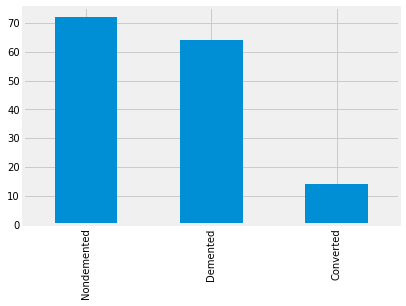

In [273]:
mri_2_norm.Dementia.value_counts().plot(kind='bar');

In [274]:
mri_2_norm.groupby('Dementia')[["Age", "Education", "SES", "MMSE", "eTIV", "nWBV", "ASF"]].mean()

,Age,Education,SES,MMSE,eTIV,nWBV,ASF
Dementia,,,,,,,
Converted,0.474206,0.537815,0.214286,0.950549,0.364914,0.439467,0.509454
Demented,0.419705,0.452206,0.414062,0.640625,0.408492,0.363789,0.473116
Nondemented,0.428627,0.539216,0.354167,0.938034,0.413323,0.486582,0.470997


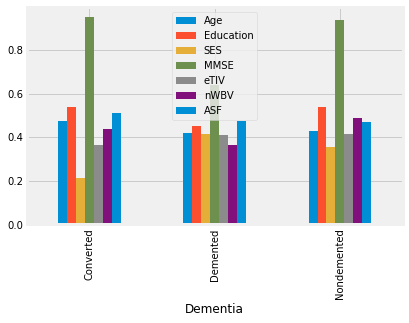

In [275]:
mri_2_norm.groupby('Dementia')[["Age", "Education", "SES", "MMSE", "eTIV", "nWBV", "ASF"]].mean().plot(kind='bar');

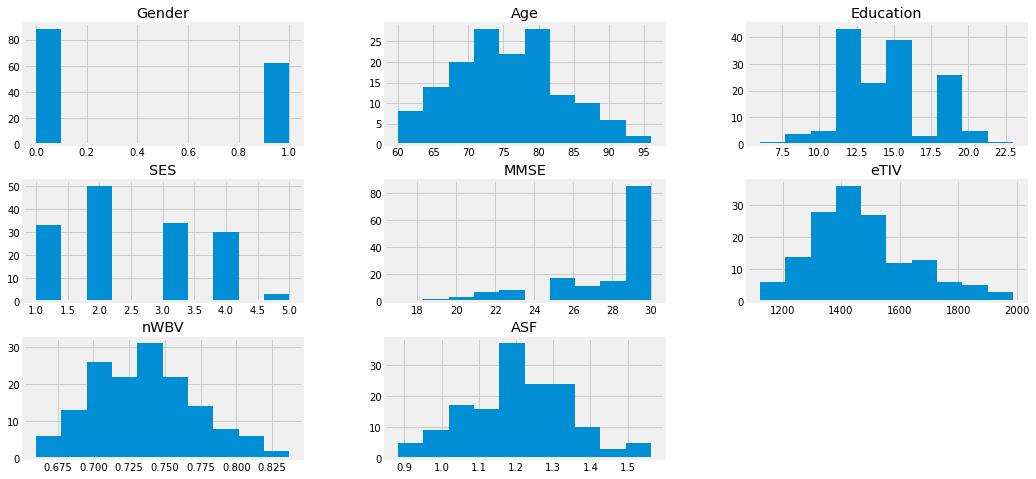

In [276]:
mri_2.hist(figsize=(16,8));

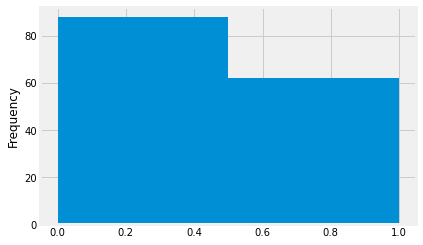

In [277]:
mri_2.Gender.plot(kind='hist', bins=2);

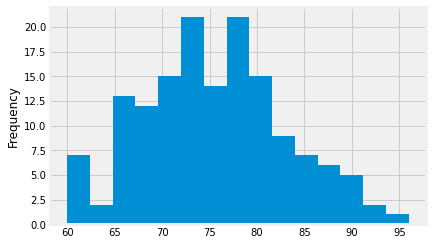

In [278]:
mri_2.Age.plot(kind='hist', bins=15);

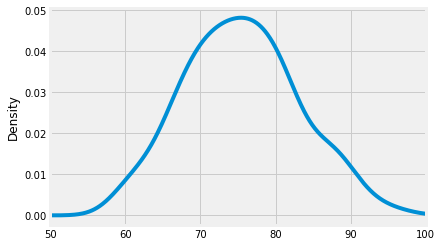

In [279]:
mri_2.Age.plot(kind='density', xlim=(50, 100));

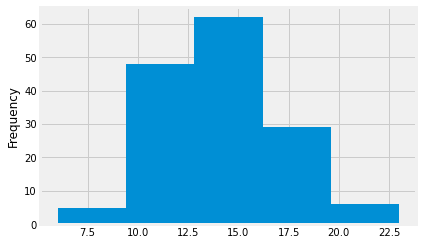

In [280]:
mri_2.Education.plot(kind='hist', bins=5);

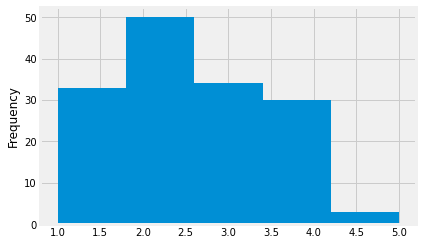

In [281]:
mri_2.SES.plot(kind='hist', bins=5);

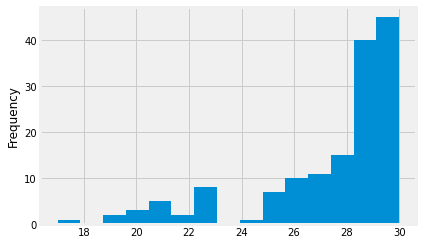

In [282]:
mri_2.MMSE.plot(kind='hist', bins=15);

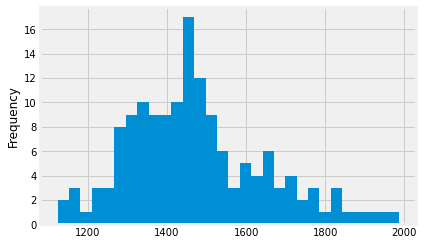

In [283]:
mri_2.eTIV.plot(kind='hist', bins=30);

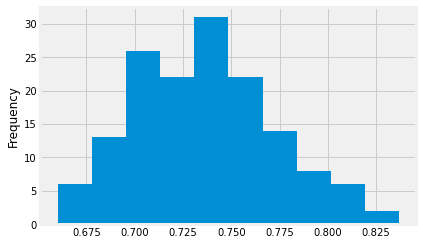

In [284]:
mri_2.nWBV.plot(kind='hist', bins=10);

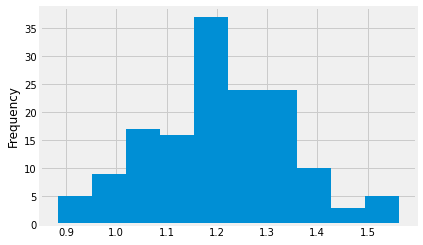

In [285]:
mri_2.ASF.plot(kind='hist', bins=10);

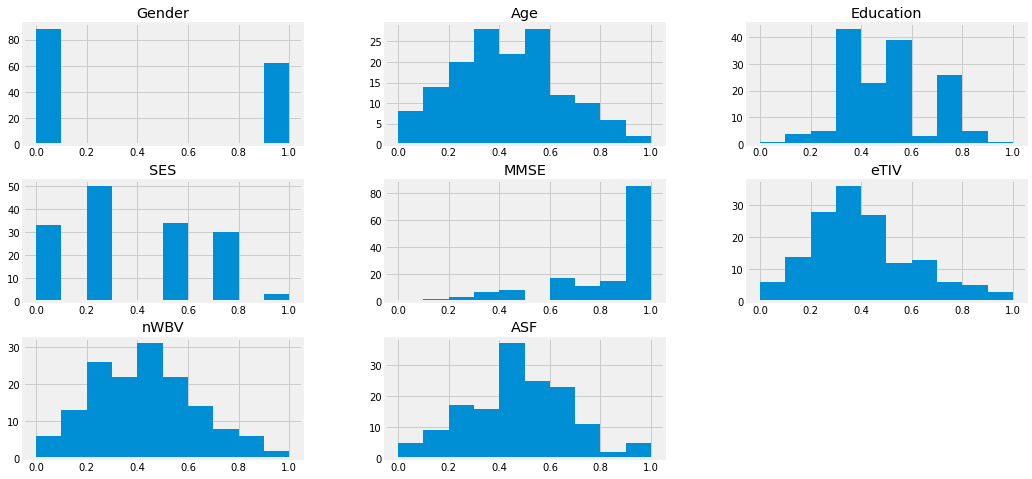

In [286]:
mri_2_norm.hist(figsize=(16,8));

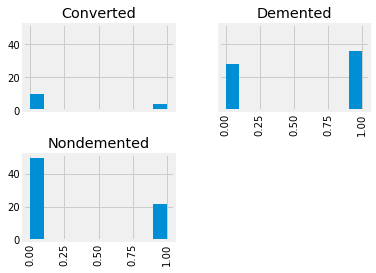

In [287]:
mri_2.hist(column='Gender', by='Dementia', sharex=True, sharey=True, layout=(2, 2));

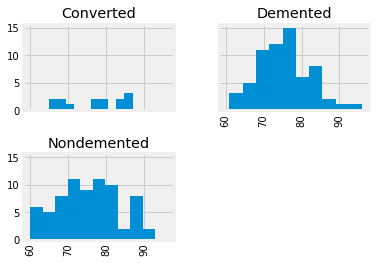

In [288]:
mri_2.hist(column='Age', by='Dementia', sharex=True, sharey=True, layout=(2, 2));

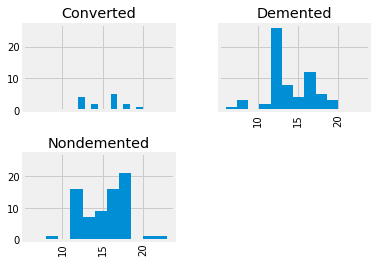

In [289]:
mri_2.hist(column='Education', by='Dementia', sharex=True, sharey=True, layout=(2, 2));

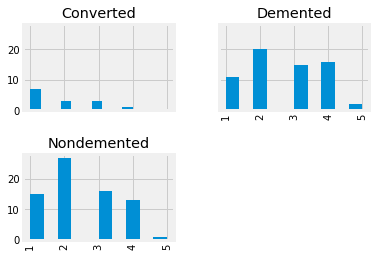

In [290]:
mri_2.hist(column='SES', by='Dementia', sharex=True, sharey=True, layout=(2, 2));

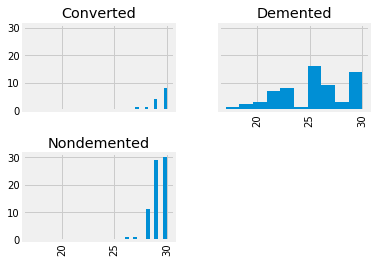

In [291]:
mri_2.hist(column='MMSE', by='Dementia', sharex=True, sharey=True, layout=(2, 2));

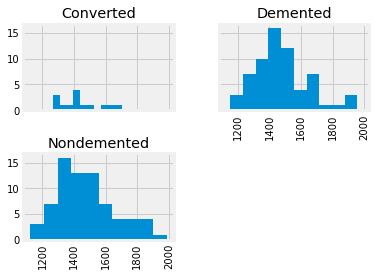

In [292]:
mri_2.hist(column='eTIV', by='Dementia', sharex=True, sharey=True, layout=(2, 2));

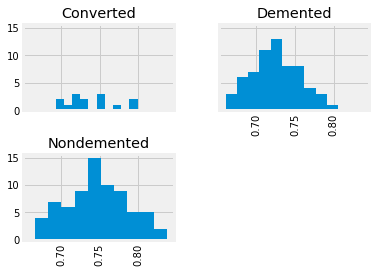

In [293]:
mri_2.hist(column='nWBV', by='Dementia', sharex=True, sharey=True, layout=(2, 2));

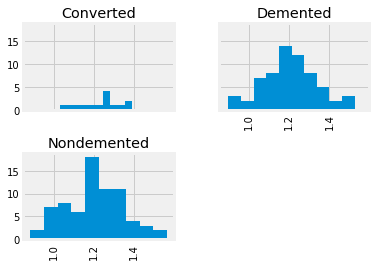

In [294]:
mri_2.hist(column='ASF', by='Dementia', sharex=True, sharey=True, layout=(2, 2));

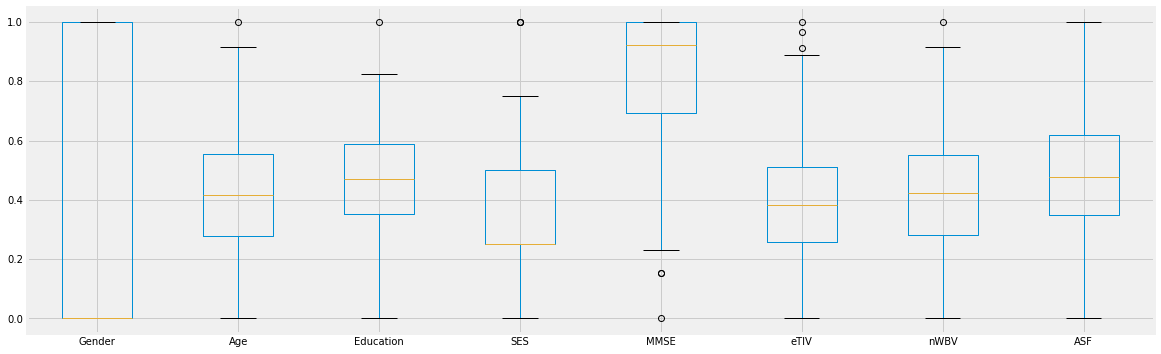

In [295]:
mri_2_norm.boxplot(figsize=(18,6));

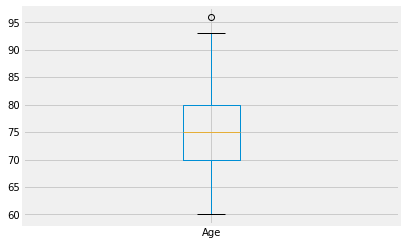

In [296]:
mri_2.Age.plot(kind="box");

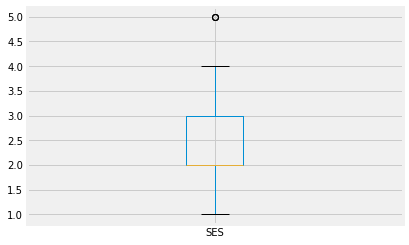

In [297]:
mri_2.SES.plot(kind="box");

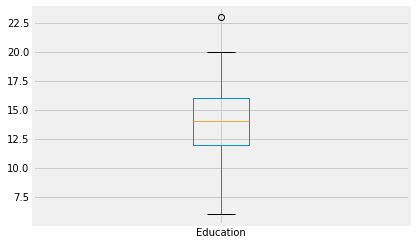

In [298]:
mri_2.Education.plot(kind="box");

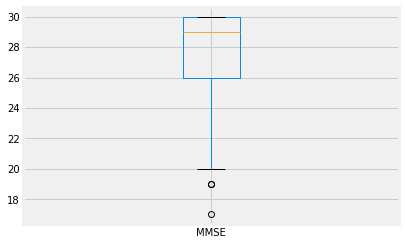

In [299]:
mri_2.MMSE.plot(kind="box");

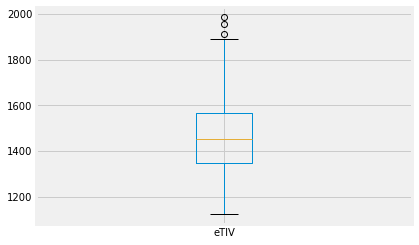

In [300]:
mri_2.eTIV.plot(kind="box");

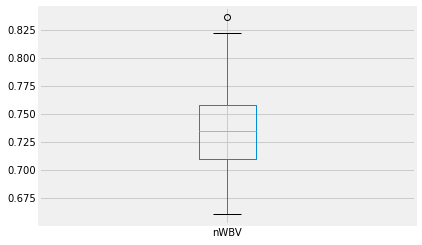

In [301]:
mri_2.nWBV.plot(kind="box");

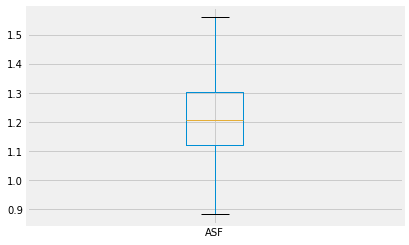

In [302]:
mri_2.ASF.plot(kind="box");

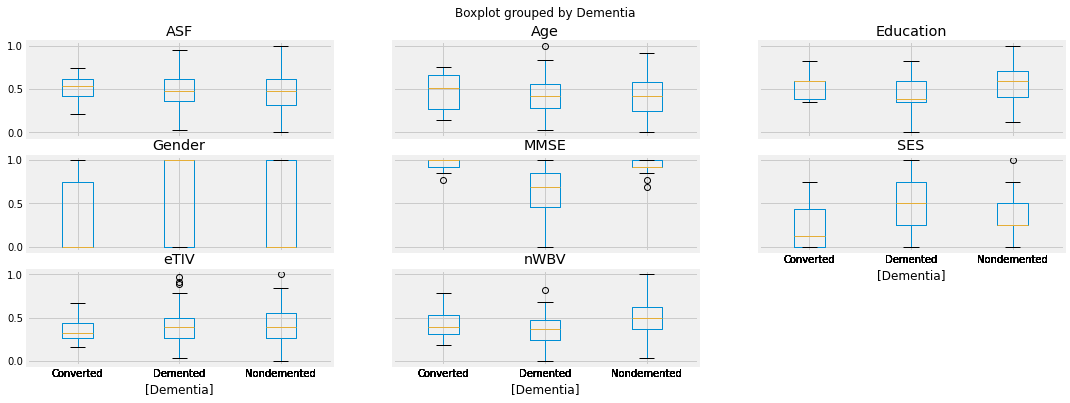

In [303]:
mri_2_norm.boxplot(by='Dementia', figsize=(18,6));

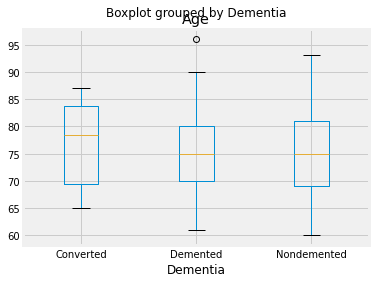

In [304]:
mri_2.boxplot(column="Age", by='Dementia');

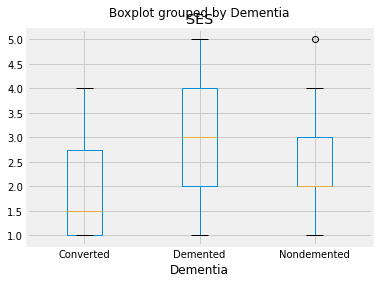

In [305]:
mri_2.boxplot(column="SES", by='Dementia');

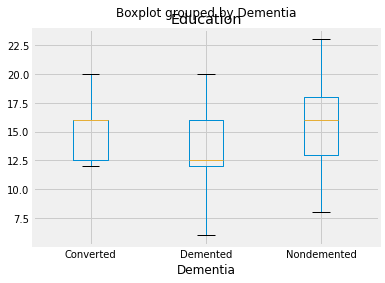

In [306]:
mri_2.boxplot(column="Education", by='Dementia');

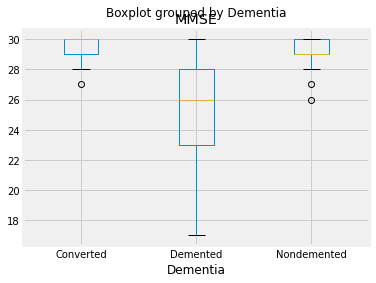

In [307]:
mri_2.boxplot(column="MMSE", by='Dementia');

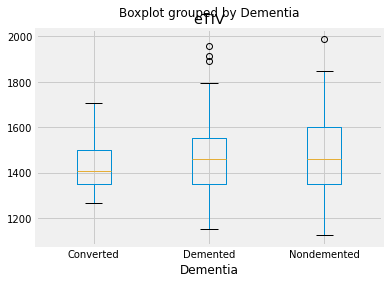

In [308]:
mri_2.boxplot(column="eTIV", by='Dementia');

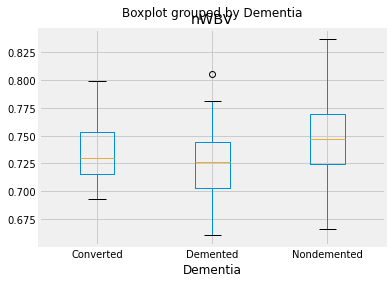

In [309]:
mri_2.boxplot(column="nWBV", by='Dementia');

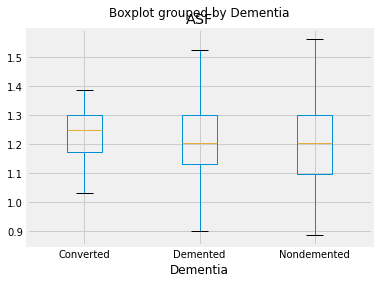

In [310]:
mri_2.boxplot(column="ASF", by="Dementia");

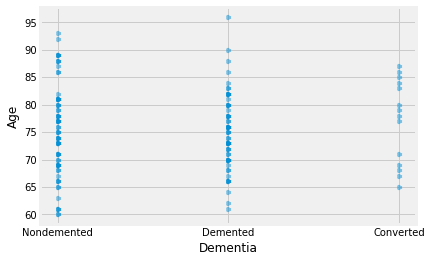

In [311]:
mri_2.plot(kind='scatter', x='Dementia', y='Age', alpha=0.5, s = 20, marker = '3');

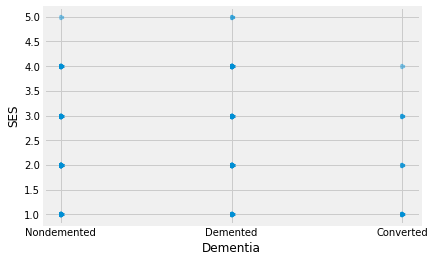

In [312]:
mri_2.plot(kind='scatter', x='Dementia', y='SES', alpha=0.5, s = 20, marker = '3');

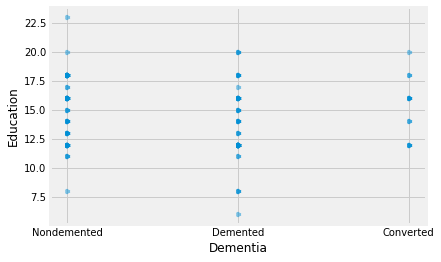

In [313]:
mri_2.plot(kind='scatter', x='Dementia', y='Education', alpha=0.5, s = 20, marker = '3');

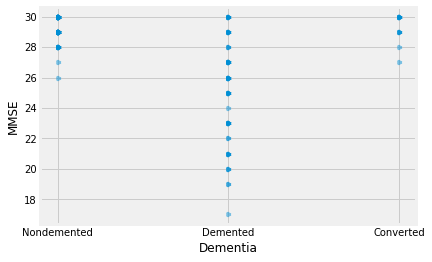

In [314]:
mri_2.plot(kind='scatter', x='Dementia', y='MMSE', alpha=0.5, s = 20, marker = '3');

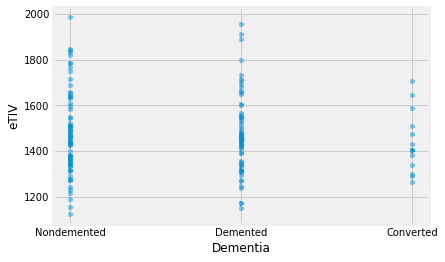

In [315]:
mri_2.plot(kind='scatter', x='Dementia', y='eTIV', alpha=0.5, s = 20, marker = '3');

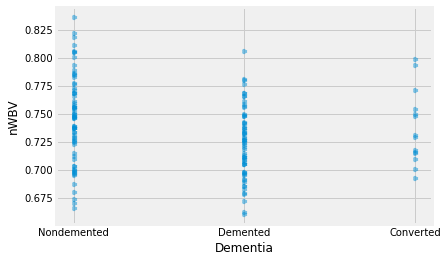

In [316]:
mri_2.plot(kind='scatter', x='Dementia', y='nWBV', alpha=0.5, s = 20, marker = '3');

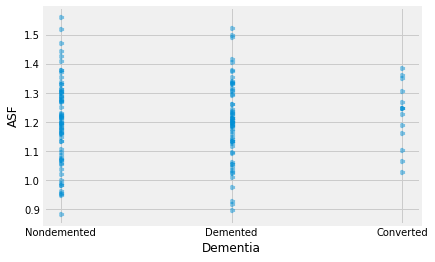

In [317]:
mri_2.plot(kind='scatter', x='Dementia', y='ASF', alpha=0.5, s = 20, marker = '3');

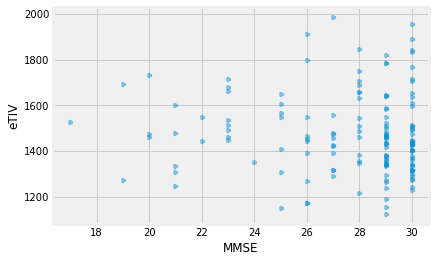

In [318]:
mri_2.plot(kind='scatter', x='MMSE', y='eTIV', alpha=0.5, s = 20, marker = '3');

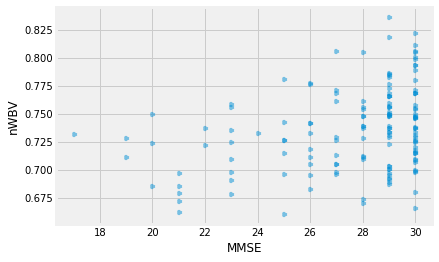

In [319]:
mri_2.plot(kind='scatter', x='MMSE', y='nWBV', alpha=0.5, s = 20, marker = '3');

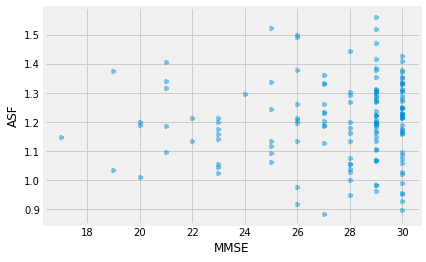

In [320]:
mri_2.plot(kind='scatter', x='MMSE', y='ASF', alpha=0.5, s = 20, marker = '3');

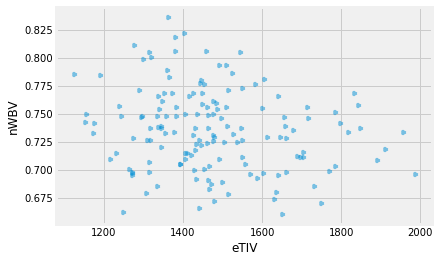

In [321]:
mri_2.plot(kind='scatter', x='eTIV', y='nWBV', alpha=0.5, s = 20, marker = '3');

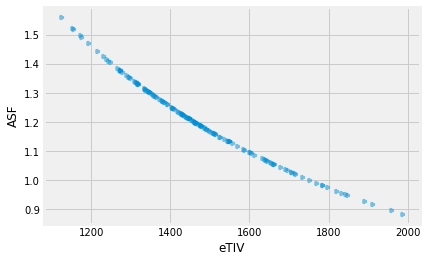

In [322]:
mri_2.plot(kind='scatter', x='eTIV', y='ASF', alpha=0.5, s = 20, marker = '3');

The variables "eTIV" and "ASF" seem to be highly correlated. We may need to drop one of them when creating our prediction models which assume independence of predictor variables. 

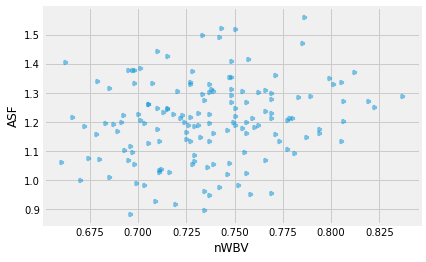

In [323]:
mri_2.plot(kind='scatter', x='nWBV', y='ASF', alpha=0.5, s = 20, marker = '3');

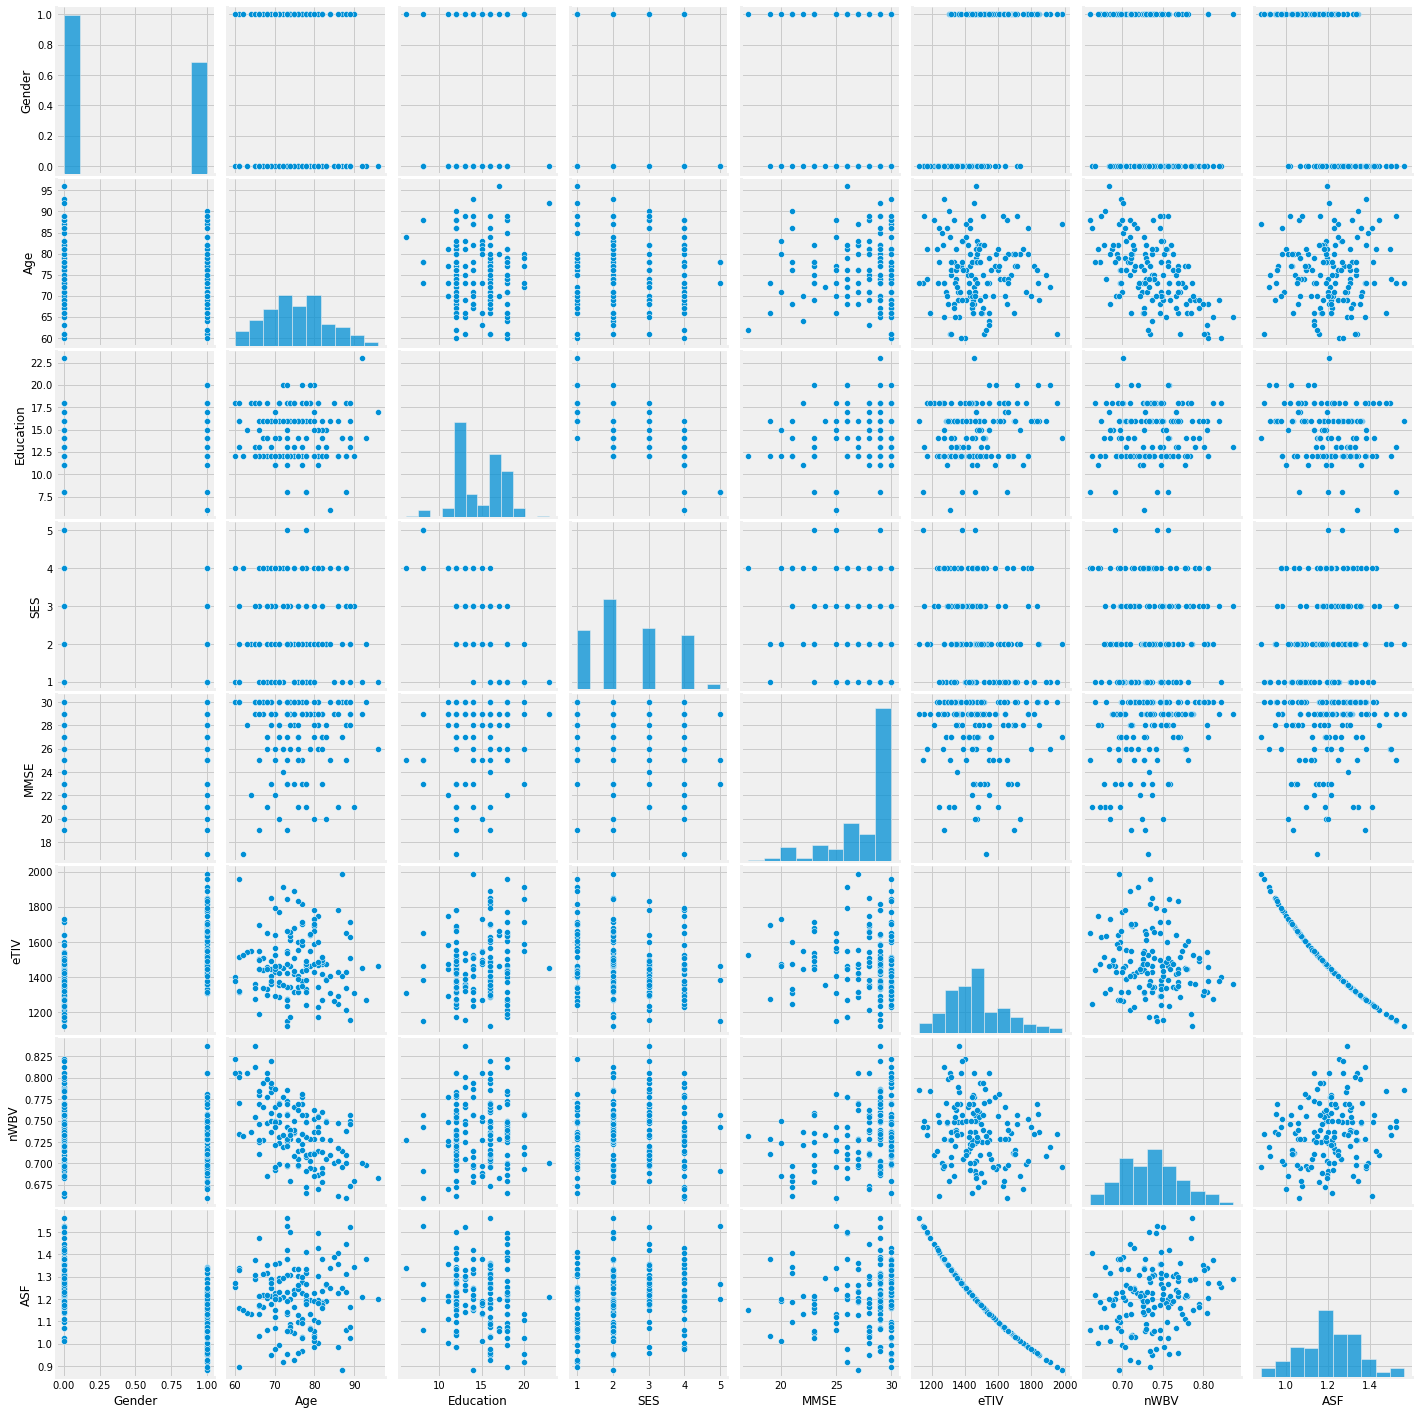

In [324]:
sns.pairplot(mri_2);

In [325]:
mri_2.corr()

,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
Gender,1.000000,-0.062457,0.070563,-0.036119,-0.218365,0.571898,-0.241635,-0.564241
Age,-0.062457,1.000000,-0.065513,-0.017147,-0.022629,-0.009693,-0.558027,0.020708
Education,0.070563,-0.065513,1.000000,-0.690613,0.216439,0.236263,0.048484,-0.218819
SES,-0.036119,-0.017147,-0.690613,1.000000,-0.166415,-0.234381,0.031349,0.224730
MMSE,-0.218365,-0.022629,0.216439,-0.166415,1.000000,-0.051549,0.322025,0.059661
eTIV,0.571898,-0.009693,0.236263,-0.234381,-0.051549,1.000000,-0.195254,-0.988228
nWBV,-0.241635,-0.558027,0.048484,0.031349,0.322025,-0.195254,1.000000,0.190626
ASF,-0.564241,0.020708,-0.218819,0.224730,0.059661,-0.988228,0.190626,1.000000


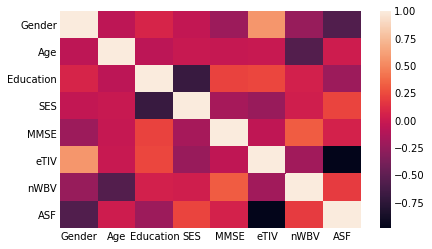

In [326]:
sns.heatmap(mri_2.corr());

In [327]:
mri_2.describe()

,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
count,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000
mean,0.413333,75.446667,14.533333,2.466667,27.56000,1474.426667,0.736073,1.206333
std,0.494081,7.545421,2.874714,1.103178,2.96847,174.683889,0.036458,0.137864
min,0.000000,60.000000,6.000000,1.000000,17.00000,1123.000000,0.660000,0.883000
25%,0.000000,70.000000,12.000000,2.000000,26.00000,1347.250000,0.710000,1.121000
50%,0.000000,75.000000,14.000000,2.000000,29.00000,1453.500000,0.735000,1.207500
75%,1.000000,80.000000,16.000000,3.000000,30.00000,1565.250000,0.757750,1.302750
max,1.000000,96.000000,23.000000,5.000000,30.00000,1987.000000,0.837000,1.563000


In [328]:
mri_2_norm.describe()

,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.413333,0.429074,0.501961,0.366667,0.812308,0.406744,0.429793,0.475490
std,0.494081,0.209595,0.169101,0.275795,0.228344,0.202180,0.205979,0.202742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.277778,0.352941,0.250000,0.692308,0.259549,0.282486,0.350000
50%,0.000000,0.416667,0.470588,0.250000,0.923077,0.382523,0.423729,0.477206
75%,1.000000,0.555556,0.588235,0.500000,1.000000,0.511863,0.552260,0.617279
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [329]:
mri_2.Dementia.value_counts(normalize=True)*100

Nondemented    48.000000
Demented       42.666667
Converted       9.333333
Name: Dementia, dtype: float64

## Outlier Handling

In the created boxplots, we have seen that we have some outliers. I will now look at those outliers more closely (I focus on outliers in variables when grouped by "Dementia") and remove or fix them.

In [330]:
from statistics import stdev

def fix_outliers_std(x, strategy='3std', std_multiplier=3):
    std = stdev(x)
    upper_bound = x.mean()+3*std
    lower_bound = max(0,x.mean()-3*std)
    mask1 = x>upper_bound
    mask2 = x<lower_bound
    x = np.where(mask1,upper_bound,
                 np.where(mask2, lower_bound, x))
    return x

In [331]:
mri_dement = mri_2[mri_2["Dementia"]=="Demented"]
mri_nondement = mri_2[mri_2["Dementia"]=="Nondemented"]
mri_converted = mri_2[mri_2["Dementia"]=="Converted"]

In [332]:
mri_dement_num = mri_dement.select_dtypes(include="number")
mri_dement_obj = mri_dement.select_dtypes(include="object")
mri_nondement_num = mri_nondement.select_dtypes(include="number")
mri_nondement_obj = mri_nondement.select_dtypes(include="object")
mri_converted_num = mri_converted.select_dtypes(include="number")
mri_converted_obj = mri_converted.select_dtypes(include="object")

In [333]:
mri_dementia = [mri_dement_num, mri_nondement_num, mri_converted_num]

for item in mri_dementia:
    for n,c in item.items():
        item[n] = fix_outliers_std(c, strategy='3std', std_multiplier=3)
        
dement_final_num = pd.concat([mri_dement_num, mri_nondement_num, mri_converted_num], axis=0, ignore_index=True)

<ipython-input-333-b155df1ba741>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item[n] = fix_outliers_std(c, strategy='3std', std_multiplier=3)
<ipython-input-333-b155df1ba741>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item[n] = fix_outliers_std(c, strategy='3std', std_multiplier=3)
<ipython-input-333-b155df1ba741>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [334]:
mri_dement_obj.reset_index(inplace=True)
mri_nondement_obj.reset_index(inplace=True)
mri_converted_obj.reset_index(inplace=True)

dement_final_obj = pd.concat([mri_dement_obj, mri_nondement_obj, mri_converted_obj], axis=0, ignore_index=True)

In [335]:
dement_final = pd.concat([dement_final_obj, dement_final_num], axis=1, ignore_index=True)

In [336]:
dement_final.drop(0, axis=1, inplace=True)

In [337]:
dement_final.rename(columns={1: "Dementia", 2: "Gender", 3: "Age", 4: "Education", 5: "SES", 6: "MMSE", 7: "eTIV", 8: "nWBV", 9: "ASF"}, inplace=True)

In [338]:
dement_final.sample(5)

,Dementia,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
44,Demented,1.0,70.0,16.0,3.0,29.0,1463.0,0.749,1.200
143,Converted,0.0,67.0,14.0,4.0,30.0,1508.0,0.794,1.164
47,Demented,0.0,67.0,16.0,1.0,29.0,1337.0,0.766,1.312
130,Nondemented,1.0,76.0,16.0,3.0,30.0,1832.0,0.769,0.958
15,Demented,1.0,68.0,14.0,4.0,21.0,1333.0,0.685,1.317


In [339]:
dement_final.shape

(150, 9)

In [340]:
dement_final

,Dementia,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
0,Demented,1.0,75.0,12.0,2.0,23.0,1678.0,0.736,1.046
1,Demented,1.0,71.0,16.0,2.0,28.0,1357.0,0.748,1.293
2,Demented,1.0,68.0,12.0,2.0,27.0,1457.0,0.806,1.205
3,Demented,0.0,66.0,12.0,3.0,30.0,1447.0,0.769,1.213
4,Demented,1.0,76.0,16.0,3.0,21.0,1602.0,0.697,1.096
...,...,...,...,...,...,...,...,...,...
145,Converted,0.0,65.0,12.0,2.0,30.0,1340.0,0.754,1.309
146,Converted,0.0,78.0,12.0,3.0,29.0,1475.0,0.731,1.190
147,Converted,1.0,77.0,16.0,1.0,30.0,1704.0,0.716,1.030
148,Converted,0.0,68.0,16.0,3.0,30.0,1298.0,0.799,1.352


### I have fixed all outliers!!!

## The following datasets are ready to use for my analyses: They have been cleaned, explored and outliers have been removed!

In [341]:
dement_final.describe()

,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.413333,75.442109,14.533333,2.466667,27.564300,1474.426667,0.736073,1.206333
std,0.494081,7.533118,2.874714,1.103178,2.966661,174.683889,0.036458,0.137864
min,0.000000,60.000000,6.000000,1.000000,17.000000,1123.000000,0.660000,0.883000
25%,0.000000,70.000000,12.000000,2.000000,26.161234,1347.250000,0.710000,1.121000
50%,0.000000,75.000000,14.000000,2.000000,29.000000,1453.500000,0.735000,1.207500
75%,1.000000,80.000000,16.000000,3.000000,30.000000,1565.250000,0.757750,1.302750
max,1.000000,95.316285,23.000000,5.000000,30.000000,1987.000000,0.837000,1.563000


In [342]:
dement_final.corr()

,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
Gender,1.000000,-0.062049,0.070563,-0.036119,-0.216766,0.571898,-0.241635,-0.564241
Age,-0.062049,1.000000,-0.066142,-0.016365,-0.023801,-0.009676,-0.558051,0.020779
Education,0.070563,-0.066142,1.000000,-0.690613,0.216300,0.236263,0.048484,-0.218819
SES,-0.036119,-0.016365,-0.690613,1.000000,-0.165811,-0.234381,0.031349,0.224730
MMSE,-0.216766,-0.023801,0.216300,-0.165811,1.000000,-0.051835,0.323899,0.059800
eTIV,0.571898,-0.009676,0.236263,-0.234381,-0.051835,1.000000,-0.195254,-0.988228
nWBV,-0.241635,-0.558051,0.048484,0.031349,0.323899,-0.195254,1.000000,0.190626
ASF,-0.564241,0.020779,-0.218819,0.224730,0.059800,-0.988228,0.190626,1.000000


In [343]:
dement_num = dement_final.select_dtypes(include="number")
dement_obj = dement_final.select_dtypes(include="object")

In [344]:
from sklearn import preprocessing

x = dement_num.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dement_numnorm = pd.DataFrame(x_scaled)
dement_obj.reset_index(inplace=True)
dement_final_norm = pd.concat([dement_obj, dement_numnorm], axis=1, ignore_index=True)

In [345]:
dement_final_norm.drop(0, axis=1, inplace=True)
dement_final_norm.sample(5)

,1,2,3,4,5,6,7,8,9
80,Nondemented,0.0,0.481364,0.588235,0.25,0.923077,0.358796,0.355932,0.502941
69,Nondemented,0.0,0.594627,0.352941,0.75,1.000000,0.123843,0.310734,0.800000
81,Nondemented,0.0,0.254840,0.588235,0.50,1.000000,0.425926,0.757062,0.432353
104,Nondemented,0.0,0.821151,0.411765,0.50,0.923077,0.035880,0.508475,0.938235
52,Demented,0.0,0.368102,0.470588,0.50,0.923077,0.133102,0.548023,0.786765


In [346]:
dement_final_norm.rename(columns={1: "Dementia", 2: "Gender", 3: "Age", 4: "Education", 5: "SES", 6: "MMSE", 7: "eTIV", 8: "nWBV", 9: "ASF"}, inplace=True)

In [347]:
dement_final_norm.describe()

,Gender,Age,Education,SES,MMSE,eTIV,nWBV,ASF
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.413333,0.437252,0.501961,0.366667,0.812638,0.406744,0.429793,0.475490
std,0.494081,0.213304,0.169101,0.275795,0.228205,0.202180,0.205979,0.202742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.283155,0.352941,0.250000,0.704710,0.259549,0.282486,0.350000
50%,0.000000,0.424733,0.470588,0.250000,0.923077,0.382523,0.423729,0.477206
75%,1.000000,0.566311,0.588235,0.500000,1.000000,0.511863,0.552260,0.617279
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Now, I am ready to build prediction models with my data. As I have a categorical outcome variable, I first plan to create a dump classifier, and then further prediction machine learning models (depending on the course content) and compare their prediction accuracy.

## Project (2): Dump Classifier Models

Because the variables "eTIV" and "ASF" are highly correlated, we now drop "ASF" from our datasets:

In [348]:
dement_final.drop("ASF", axis=1, inplace=True)

### Assign our dependent (y) and independent variables (X):

In [349]:
X = dement_final.drop('Dementia', axis=1)
y = dement_final.Dementia

### Dump Classifier (Chance)

For our first model, I will predict "Dementia" classification by chance:

In [350]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_null = np.zeros_like(y_test, dtype=str)

In [351]:
y_null = [np.random.choice(["Demented", "Nondemented", "Converted"]) for i in np.arange(len(y_null))]

In [352]:
y_null = pd.DataFrame(y_null)
y_test1 = pd.DataFrame(y_test).reset_index()
y_pred = pd.concat([y_null, y_test1], axis=1)
y_pred.rename(columns={0: "y_null", "Dementia": "y_test"}, inplace=True)

#### Accuracy:

In [353]:
chance_probability = len(y_pred[y_pred.y_null==y_pred.y_test])/len(y_pred)*100

In [354]:
prediction_accuracy = pd.DataFrame([[chance_probability]], columns=['Chance'], index =['Probability'])

In [355]:
prediction_accuracy

,Chance
Probability,34.210526


This is our baseline prediction model and our current "Champion"! I will compare future models against this metric.

Classification Report:
----------------------
               precision    recall  f1-score   support

   Converted       0.13      0.50      0.21         4
    Demented       0.54      0.39      0.45        18
 Nondemented       0.40      0.25      0.31        16

    accuracy                           0.34        38
   macro avg       0.36      0.38      0.32        38
weighted avg       0.44      0.34      0.37        38



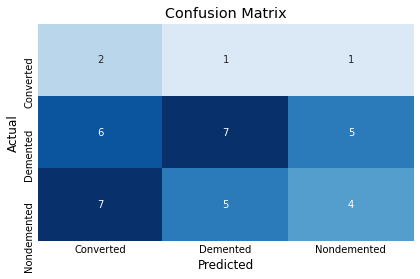

In [356]:
cm = confusion_matrix(y_pred["y_test"], y_pred["y_null"])
clr = classification_report(y_pred["y_test"], y_pred["y_null"])

ax = plt.subplot()
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Converted", "Demented", "Nondemented"])
ax.yaxis.set_ticklabels(["Converted", "Demented", "Nondemented"])

print("Classification Report:\n----------------------\n", clr)

In [357]:
from sklearn.metrics import f1_score

In [358]:
chance_macro = metrics.f1_score(y_pred["y_test"], y_pred["y_null"], average='macro')

In [359]:
df_chance_macro = pd.DataFrame([[chance_macro]], columns=['Chance'], index =['Macro F1'])

In [360]:
prediction_accuracy = pd.concat([prediction_accuracy, df_chance_macro], axis=0)

In [361]:
prediction_accuracy

,Chance
Probability,34.210526
Macro F1,0.323277


Our aim is to increase "Probability" and the "Macro F1 Score" with future models!

### Dump Classifier (Mode)

For my second model, I will predict "Dementia" by the "Dementia" mode:

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_null = np.zeros_like(y_test, dtype=str)

In [363]:
y_train.value_counts()

Nondemented    56
Demented       46
Converted      10
Name: Dementia, dtype: int64

Our mode is "Nondemented".

In [364]:
y_null = np.zeros_like(y_test, dtype=str)

In [365]:
y_null = [["Nondemented"] for i in np.arange(len(y_null))]

In [366]:
y_null = pd.DataFrame(y_null)
y_test2 = pd.DataFrame(y_test).reset_index()
y_pred = pd.concat([y_null, y_test2], axis=1)
y_pred.rename(columns={0: "y_null", "Dementia": "y_test"}, inplace=True)

#### Accuracy:

In [367]:
mode_probability = len(y_pred[y_pred.y_null==y_pred.y_test])/len(y_pred)*100

In [368]:
df_mode_probability = pd.DataFrame([[mode_probability]], columns=['Mode'], index =['Probability'])

C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
----------------------
               precision    recall  f1-score   support

   Converted       0.00      0.00      0.00         4
    Demented       0.00      0.00      0.00        18
 Nondemented       0.42      1.00      0.59        16

    accuracy                           0.42        38
   macro avg       0.14      0.33      0.20        38
weighted avg       0.18      0.42      0.25        38



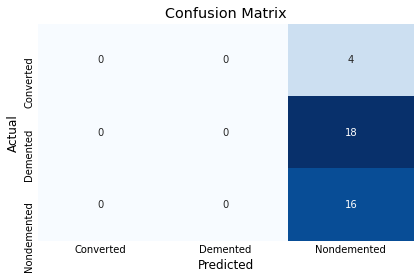

In [369]:
cm = confusion_matrix(y_pred["y_test"], y_pred["y_null"])
clr = classification_report(y_pred["y_test"], y_pred["y_null"])

ax = plt.subplot()
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Converted", "Demented", "Nondemented"])
ax.yaxis.set_ticklabels(["Converted", "Demented", "Nondemented"])

print("Classification Report:\n----------------------\n", clr)

In [370]:
mode_macro = metrics.f1_score(y_pred["y_test"], y_pred["y_null"], average='macro')

In [371]:
df_mode_macro = pd.DataFrame([[mode_macro]], columns=['Mode'], index =['Macro F1'])

In [372]:
df_mode = pd.concat([df_mode_probability, df_mode_macro], axis=0)

In [373]:
prediction_accuracy = pd.concat([prediction_accuracy, df_mode], axis=1)

In [374]:
prediction_accuracy

,Chance,Mode
Probability,34.210526,42.105263
Macro F1,0.323277,0.197531


We can see that the Mode Model is better at predicting our "Dementia" values than the "Chance" Model (based on Probability), but our F1 score has dratsically decreased! We need to build a model that increases both. 

## Project (2): Logistic Regression

In [375]:
feature_cols = dement_final.columns.tolist()
feature_cols.remove("Dementia")
print(feature_cols)

['Gender', 'Age', 'Education', 'SES', 'MMSE', 'eTIV', 'nWBV']


In [376]:
X = dement_final[feature_cols]
y = dement_final.Dementia

### Train-Test Split

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [378]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 7), (38, 7), (112,), (38,))

### Import:

In [379]:
from sklearn.linear_model import LogisticRegression

### Instantiate:

In [380]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

### Fit:

In [381]:
logreg.fit(X_train, y_train)

C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

### Predict:

In [382]:
y_pred = logreg.predict(X_test)

### Accuracy:

In [383]:
logreg_probability = len(y_pred[y_pred==y_test])/len(y_pred)*100

In [384]:
df_logreg_probability = pd.DataFrame([[logreg_probability]], columns=['Logistic Regression'], index =['Probability'])

Classification Report:
----------------------
               precision    recall  f1-score   support

   Converted       0.00      0.00      0.00         4
    Demented       0.81      0.72      0.76        18
 Nondemented       0.58      0.69      0.63        16

    accuracy                           0.63        38
   macro avg       0.46      0.47      0.46        38
weighted avg       0.63      0.63      0.63        38



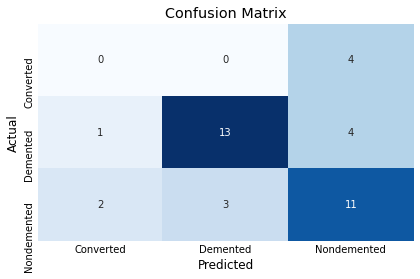

In [385]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Converted", "Demented", "Nondemented"])
ax.yaxis.set_ticklabels(["Converted", "Demented", "Nondemented"])

print("Classification Report:\n----------------------\n", clr)

In [386]:
logreg_macro = metrics.f1_score(y_test, y_pred, average='macro')

In [387]:
df_logreg_macro = pd.DataFrame([[logreg_macro]], columns=['Logistic Regression'], index =['Macro F1'])

In [388]:
df_logreg = pd.concat([df_logreg_probability, df_logreg_macro], axis=0)

In [389]:
prediction_accuracy = pd.concat([prediction_accuracy, df_logreg], axis=1)

In [390]:
prediction_accuracy

,Chance,Mode,Logistic Regression
Probability,34.210526,42.105263,63.157895
Macro F1,0.323277,0.197531,0.464426


Both our probability and macro F1 score have increased, making our "Logistic Regression" Model our new champion! However, our model has difficulties predicting "Converted", which is the main goal of the model.

## Project (2): Random Forests

In [391]:
feature_cols

['Gender', 'Age', 'Education', 'SES', 'MMSE', 'eTIV', 'nWBV']

In [392]:
X = dement_final[feature_cols]
y = dement_final.Dementia

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

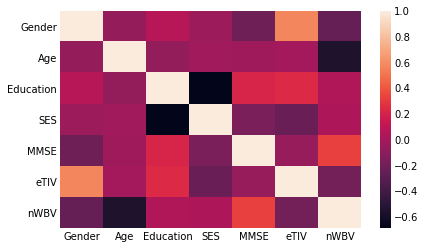

In [394]:
import seaborn as sns
sns.heatmap(dement_final[feature_cols+['Dementia']].corr());

### Accuracy (R-Squared):

In [395]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train,y_train)
print ("Training Score:",model.score(X_train,y_train))
print ("Test Score:",model.score(X_test,y_test))

Training Score: 1.0
Test Score: 0.7105263157894737


### Feature Importance:

In [396]:
def get_feature_importance(model, features):
    return pd.DataFrame({'features':features, 'imp':model.feature_importances_}
                       ).sort_values('imp', ascending=True)

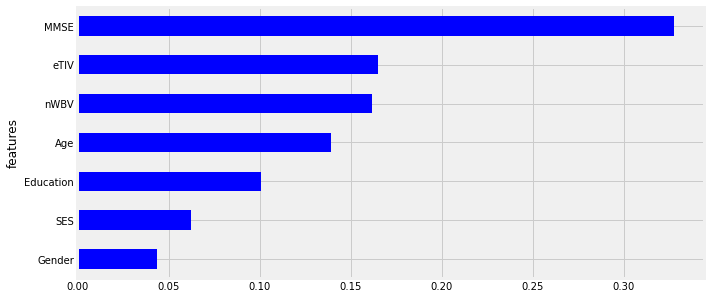

In [397]:
df_fi = get_feature_importance(model, feature_cols)
df_fi.plot('features', 'imp', 'barh', figsize=(10,5), color='b', legend=False);

### Improving Our Model:

In [398]:
dict_results={}; 
for max_feat in np.arange(1,6):
    for min_leaf in np.arange(1,5):
        for max_dep in np.arange(1,20):
            model = RandomForestClassifier(n_estimators=100,
                                           min_samples_leaf=min_leaf,
                                           max_features=max_feat,
                                           max_depth=max_dep,
                                           random_state=42,
                                           n_jobs=-1)
            model.fit(X_train,y_train)
            dict_results[(max_feat, min_leaf, max_dep)]=model.score(X_test,y_test)

In [399]:
pd.DataFrame.from_dict(dict_results, orient='index').sort_values(by=0,ascending=False).head()

,0
"(2, 2, 12)",0.815789
"(2, 3, 15)",0.815789
"(2, 2, 10)",0.815789
"(2, 2, 9)",0.815789
"(2, 2, 8)",0.815789


### Testing our Final Model:

### Accuracy (R-Squared):

In [400]:
model = RandomForestClassifier(n_estimators=100,
                               min_samples_leaf=2,
                               max_features=2,
                               max_depth=12,
                               random_state=42,
                               n_jobs=-1)
model.fit(X_train,y_train)
print ("Training Score:",model.score(X_train,y_train))
print ("Test Score:",model.score(X_test,y_test))

Training Score: 0.9375
Test Score: 0.8157894736842105


### Feature Importance:

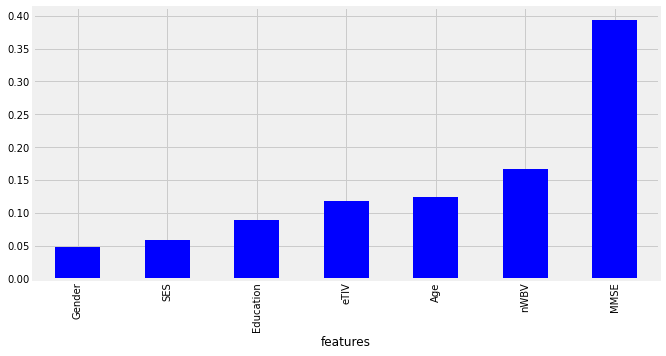

In [401]:
df_fi = get_feature_importance(model, feature_cols)
df_fi.plot('features', 'imp', 'bar', figsize=(10,5), color='b', legend=False);

### Accuracy:

In [402]:
y_pred = model.predict(X_test)

In [403]:
rf_probability = len(y_pred[y_pred==y_test])/len(y_pred)*100

In [404]:
df_rf_probability = pd.DataFrame([[rf_probability]], columns=['Random Forest'], index =['Probability'])

C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenav\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
----------------------
               precision    recall  f1-score   support

   Converted       0.00      0.00      0.00         4
    Demented       0.89      0.94      0.92        18
 Nondemented       0.74      0.88      0.80        16

    accuracy                           0.82        38
   macro avg       0.54      0.61      0.57        38
weighted avg       0.73      0.82      0.77        38



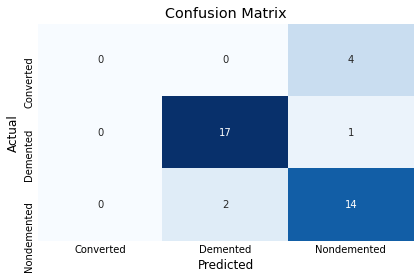

In [405]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Converted", "Demented", "Nondemented"])
ax.yaxis.set_ticklabels(["Converted", "Demented", "Nondemented"])

print("Classification Report:\n----------------------\n", clr)

In [406]:
rf_macro = metrics.f1_score(y_test, y_pred, average='macro')

In [407]:
df_rf_macro = pd.DataFrame([[rf_macro]], columns=['Random Forest'], index =['Macro F1'])

In [408]:
df_rf = pd.concat([df_rf_probability, df_rf_macro], axis=0)

In [409]:
prediction_accuracy = pd.concat([prediction_accuracy, df_rf], axis=1)

In [410]:
prediction_accuracy

,Chance,Mode,Logistic Regression,Random Forest
Probability,34.210526,42.105263,63.157895,81.578947
Macro F1,0.323277,0.197531,0.464426,0.572973


In [411]:
plot = prediction_accuracy.T

In [412]:
plot

,Probability,Macro F1
Chance,34.210526,0.323277
Mode,42.105263,0.197531
Logistic Regression,63.157895,0.464426
Random Forest,81.578947,0.572973


In [413]:
plot["Probability"] = plot["Probability"].div(100)

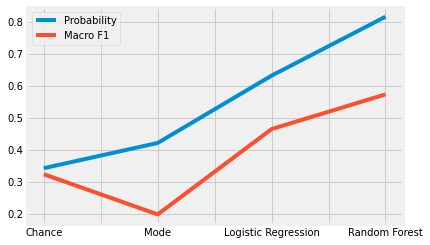

In [414]:
plot.plot();

Our Random Forest model has high probability and a better macro F1 value. The most important features are MMSE, nWBV, Age, eTIV, and even Education. SES and Gender do not seem important.

However, our model is not good at predicting "Converted" which was our primary goal - so we need to continue refining it!

#### I will try optimizing the recall score instead of the F1 score of our model:

In [415]:
dict_results={}; 
for max_feat in np.arange(1,6):
    for min_leaf in np.arange(1,5):
        for max_dep in np.arange(1,20):
            model = RandomForestClassifier(n_estimators=100,
                                           min_samples_leaf=min_leaf,
                                           max_features=max_feat,
                                           max_depth=max_dep,
                                           random_state=42,
                                           n_jobs=-1)
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
            dict_results[(max_feat, min_leaf, max_dep)]=metrics.recall_score(y_test, y_pred, average="macro")

In [416]:
pd.DataFrame.from_dict(dict_results, orient='index').sort_values(by=0,ascending=False).head()

,0
"(2, 2, 7)",0.606481
"(2, 4, 15)",0.606481
"(2, 4, 13)",0.606481
"(2, 4, 12)",0.606481
"(2, 4, 11)",0.606481


#### It seems like we cannot improve our overall recall score. We can now try and improve the recall score for "Converted" only at the cost of reducing the recall score for our other classes:

In [417]:
metrics.recall_score(y_test, y_pred, labels="Converted", average=None)

array([0.        , 0.83333333, 0.875     ])

In [418]:
dict_results={}; 
for max_feat in np.arange(1,6):
    for min_leaf in np.arange(1,5):
        for max_dep in np.arange(1,20):
            model = RandomForestClassifier(n_estimators=100,
                                           min_samples_leaf=min_leaf,
                                           max_features=max_feat,
                                           max_depth=max_dep,
                                           random_state=42,
                                           n_jobs=-1)
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
            recall = metrics.recall_score(y_test, y_pred, labels="Converted", average=None)
            dict_results[(max_feat, min_leaf, max_dep)]=recall[0]

In [419]:
pd.DataFrame.from_dict(dict_results, orient='index').sort_values(by=0,ascending=False).head()

,0
"(1, 1, 1)",0.0
"(4, 2, 4)",0.0
"(4, 2, 13)",0.0
"(4, 2, 12)",0.0
"(4, 2, 11)",0.0


Unfortunately, we are not able to improve our model in any way. While we can reliably predict "Demented" vs. "Nondemented", we cannot predict who will develop Dementia later in life. I need more data for future models as my current analyses were constrained by very few "Converted".